In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.stats.api as sms

C:\Users\GRZEGORZ\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<br>

## Merge Data

In [2]:
d = pd.read_csv(r'https://raw.githubusercontent.com/GrzegorzPus/NBA_analysis/main/Data/draft-data-20-years.csv')
d.head(3)

,Unnamed: 0,Rk,Pk,Tm,Player,College,Yrs,G,TOTMP,TOTPTS,...,WS/48,BPM,VORP,DraftYr,MPG,PPG,RPG,APG,playerurl,DraftYear
0,1,1,1,BRK,Derrick Coleman,Syracuse,15.0,781.0,25903.0,12884.0,...,0.119,1.4,22.3,1990,33.2,16.5,9.3,2.5,https://www.sports-reference.com/cbb/players/d...,1990
1,2,2,2,OKC,Gary Payton,Oregon State,17.0,1335.0,47117.0,21813.0,...,0.148,3.3,62.5,1990,35.3,16.3,3.9,6.7,https://www.sports-reference.com/cbb/players/g...,1990
2,3,3,3,DEN,Mahmoud Abdul-Rauf,LSU,9.0,586.0,15628.0,8553.0,...,0.077,-0.8,4.5,1990,26.7,14.6,1.9,3.5,https://www.sports-reference.com/cbb/players/m...,1990


In [3]:
d2 = pd.read_csv('https://raw.githubusercontent.com/GrzegorzPus/NBA_analysis/main/Data/player_data.csv')

In [4]:
merged_df = d.merge(d2, on='Player', how='left')
merged_df = merged_df.drop(['playerurl', 'From', 'To','Colleges'], axis=1)

In [5]:
merged_df.head(3)

,Unnamed: 0,Rk,Pk,Tm,Player,College,Yrs,G,TOTMP,TOTPTS,...,DraftYr,MPG,PPG,RPG,APG,DraftYear,Pos,Ht,Wt,Birth Date
0,1,1,1,BRK,Derrick Coleman,Syracuse,15.0,781.0,25903.0,12884.0,...,1990,33.2,16.5,9.3,2.5,1990,F-C,6-10,230.0,June 21 1967
1,2,2,2,OKC,Gary Payton,Oregon State,17.0,1335.0,47117.0,21813.0,...,1990,35.3,16.3,3.9,6.7,1990,NaN,NaN,NaN,NaN
2,3,3,3,DEN,Mahmoud Abdul-Rauf,LSU,9.0,586.0,15628.0,8553.0,...,1990,26.7,14.6,1.9,3.5,1990,G,6-1,162.0,March 9 1969


In [6]:
d3 = pd.read_csv(r"C:\Users\GRZEGORZ\OneDrive\Pulpit\Portfolio_Projects\players.csv")

In [7]:
d3 = d3.rename(columns={'name': 'Player'})
selected_columns = d3[["Player"] + list(d3.columns[1:3]) + ["height"] + list(d3.columns[21:24])]
result = pd.merge(d, selected_columns, on="Player", how="left")

In [8]:
merged_df1 = merged_df[['Player', 'Ht']]
result1 = result[['Player', 'height']]

merged_df1 = merged_df1.merge(result1, on='Player', how='left')
merged_df1['Ht'].fillna(merged_df1['height'], inplace=True)
merged_df1.drop('height', axis=1, inplace=True)

merged_df2 = merged_df[['Player', 'Wt']]
result2 = result[['Player', 'weight']]

merged_df2 = merged_df2.merge(result2, on='Player', how='left')
merged_df2['Wt'].fillna(merged_df2['weight'], inplace=True)
merged_df2.drop('weight', axis=1, inplace=True)

merged_df3 = merged_df[['Player', 'Birth Date']]
result3 = result[['Player', 'birthDate']]

merged_df3 = merged_df3.merge(result3, on='Player', how='left')
merged_df3['Birth Date'].fillna(merged_df3['birthDate'], inplace=True)
merged_df3.drop('birthDate', axis=1, inplace=True)

In [9]:
m = pd.merge(merged_df1, merged_df2, on="Player", how="left")

In [10]:
merged_all = pd.merge(m, merged_df3, on="Player", how="left")

In [11]:
aw = pd.merge(d, merged_all, on="Player", how="left")

<br>

## Advanced Career Statistics

In [12]:
data = aw.drop_duplicates().reset_index()

In [13]:
data.rename(columns={'Ht':'Height', 'Wt': 'Weight'}, inplace=True)

In [14]:
col_to_drop = ['playerurl', 'Rk', 'DraftYr', 'WS', 'College', 'index', 'Unnamed: 0']
data = data.drop(columns=col_to_drop)
data.head(3)

,Pk,Tm,Player,Yrs,G,TOTMP,TOTPTS,TOTTRB,TOTAST,FG%,...,BPM,VORP,MPG,PPG,RPG,APG,DraftYear,Height,Weight,Birth Date
0,1,BRK,Derrick Coleman,15.0,781.0,25903.0,12884.0,7232.0,1985.0,0.447,...,1.4,22.3,33.2,16.5,9.3,2.5,1990,6-10,230.0,June 21 1967
1,2,OKC,Gary Payton,17.0,1335.0,47117.0,21813.0,5269.0,8966.0,0.466,...,3.3,62.5,35.3,16.3,3.9,6.7,1990,6-4,180lb,"July 23, 1968"
2,3,DEN,Mahmoud Abdul-Rauf,9.0,586.0,15628.0,8553.0,1087.0,2079.0,0.442,...,-0.8,4.5,26.7,14.6,1.9,3.5,1990,6-1,162.0,March 9 1969


- **Pk**: Draft pick oznacza to, że dana drużyna ma prawo do wyboru określonego zawodnika na określonej pozycji w hierarchii draftu
- **Tm**: Drużyna
- **Player**: Zawodnik
- **Yrs**: Lata spędzone w lidze NBA
- **G**: Rozegrane mecze w całej karierze
- **TOTMP**: Łączna ilość minut rozegranych przez zawodnika w karierze
- **TOTPTS**: Łączna ilość zdobytych punktów zawodnika w karierze
- **TOTTRB**: Łączna ilość zbiórek zawodnika w karierze
- **TOTAST**: Łączna ilość asyst zawodnika w karierze
- **FG%**: Procent trafionych rzutów przez zawodnika w karierze
- **3P%**: Procent trafionych rzutów za 3 punkty przez zawodnika w karierze
- **FT%**: Procent trafionych rzutów wolnych przez zawodnika w karierze
- **WS/48**: Udziały zawodnika w zwycięstwach na 48 minut
- **BPM**: Wskaźnik, który szacuje wkład zawodnika, gdy ten jest na boisku
- **VORP**: Szacunkowa liczbę punktów na 100 posiadań drużyny, które zawodnik zdobywa w stosunku do gracza zmieniającego go
- **MPG**: Średnia liczba minut rozegranych przez zawodnika w meczu
- **PPG**: Średnia liczba punktów zdobytych przez zawodnika w meczu
- **RPG**: Średnia liczba zbiórek zdobywych przez zawodnika w meczu
- **APG**: Średnia liczba asyst zdobywanych przez zawodnika w meczu
- **DraftYear**: Rok w którym zawodnik trafił do ligi NBA
- **Height**: Wzrost zawodnika
- **Weight**: Waga zawodnika
- **Birth Date**: Data urodzenia zawodnika

<br>

### Clean data

In [15]:
# Remove duplicates
data = data.reset_index()

In [16]:
data[data['Player'] == 'Jay Williams']

,index,Pk,Tm,Player,Yrs,G,TOTMP,TOTPTS,TOTTRB,TOTAST,...,BPM,VORP,MPG,PPG,RPG,APG,DraftYear,Height,Weight,Birth Date
753,753,2,CHI,Jay Williams,1.0,75.0,1961.0,714.0,195.0,350.0,...,-2.0,0.0,26.1,9.5,2.6,4.7,2002,6-2,195.0,September 10 1981


In [17]:
data = data[~data['index'].between(497, 503)]
data = data[~data['index'].between(454, 479)]
data = data[~data['index'].between(156, 162)]
data = data[~data['index'].between(969, 975)]
data = data[~data['index'].between(19, 25)]
data = data[~data['index'].between(1057, 1062)]
data = data[~data['index'].isin([1055, 1803, 568, 1625])]
data = data[~data['index'].between(61, 67)]
data = data[~data['index'].between(1417, 1423)]
data = data[~data['index'].between(353, 359)]
data = data[~data['index'].between(1491, 1497)]
data = data[~data['index'].between(1211, 1217)]
data = data[~data['index'].between(1819, 1825)]
data = data[~data['index'].between(271, 277)]
data = data[~data['index'].between(739, 741)]
data = data[~data['index'].between(322, 328)]
data = data[~data['index'].between(883, 889)]
data = data[~data['index'].between(1029, 1031)]
data = data[~data['index'].between(1109, 1111)]
data = data[~data['index'].between(753, 760)]
#df = df.loc[~df.index.isin([753])]

In [18]:
data = data.drop('index', axis=1)

<br>

In [19]:
def remove_lb(x):
    if 'lb' in str(x):
        return x.replace('lb', '')
    else:
        return x

# Remove 'lb' from the 'Weight' rack and keep the numeric or NaN value
data['Weight'] = data['Weight'].apply(remove_lb)

In [20]:
data['Weight'] = data['Weight'].astype(float).astype('Int64')
data['Weight'] = data['Weight'] * 0.45359237
data['Weight'] = round(data['Weight'])

<br>

In [21]:
data['Height'] = data['Height'].str.replace('-', '.')
data['Height'] = data['Height'].astype(float)

In [22]:
def feet_to_cm(height):
    if not np.isnan(height):
        feet = int(height)
        inches = (height - feet) * 12
        cm = (feet * 12 + inches) * 2.54
        return cm
    else:
        return np.nan

data['Height'] = data['Height'].apply(feet_to_cm)
data['Height'] = round(data['Height'])

In [23]:
data['Birth Date'] = pd.to_datetime(data['Birth Date'])

In [24]:
data = data[~data['DraftYear'].between(2015, 2022)]
data = data.drop('DraftYear', axis=1)

In [25]:
data

,Pk,Tm,Player,Yrs,G,TOTMP,TOTPTS,TOTTRB,TOTAST,FG%,...,WS/48,BPM,VORP,MPG,PPG,RPG,APG,Height,Weight,Birth Date
0,1,BRK,Derrick Coleman,15.0,781.0,25903.0,12884.0,7232.0,1985.0,0.447,...,0.119,1.4,22.3,33.2,16.5,9.3,2.5,186.0,104.0,1967-06-21
1,2,OKC,Gary Payton,17.0,1335.0,47117.0,21813.0,5269.0,8966.0,0.466,...,0.148,3.3,62.5,35.3,16.3,3.9,6.7,195.0,82.0,1968-07-23
2,3,DEN,Mahmoud Abdul-Rauf,9.0,586.0,15628.0,8553.0,1087.0,2079.0,0.442,...,0.077,-0.8,4.5,26.7,14.6,1.9,3.5,186.0,73.0,1969-03-09
3,4,ORL,Dennis Scott,10.0,629.0,17983.0,8094.0,1774.0,1296.0,0.417,...,0.089,0.2,9.9,28.6,12.9,2.8,2.1,207.0,104.0,1968-09-05
4,5,CHA,Kendall Gill,15.0,966.0,29481.0,12914.0,4002.0,2945.0,0.434,...,0.078,0.1,15.8,30.5,13.4,4.1,3.0,198.0,88.0,1968-05-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,56,DEN,Devyn Marble,2.0,44.0,457.0,97.0,69.0,29.0,0.304,...,-0.028,-5.5,-0.4,10.4,2.2,1.6,0.7,201.0,91.0,1992-09-21
1577,57,IND,Louis Labeyrie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaT
1578,58,SAS,Jordan McRae,4.0,123.0,1696.0,846.0,225.0,167.0,0.417,...,0.048,-2.1,0.0,13.8,6.9,1.8,1.4,198.0,81.0,1991-03-28
1579,59,TOR,Xavier Thames,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaT


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1446 entries, 0 to 1580
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Pk          1446 non-null   int64         
 1   Tm          1446 non-null   object        
 2   Player      1446 non-null   object        
 3   Yrs         1239 non-null   float64       
 4   G           1239 non-null   float64       
 5   TOTMP       1239 non-null   float64       
 6   TOTPTS      1239 non-null   float64       
 7   TOTTRB      1239 non-null   float64       
 8   TOTAST      1239 non-null   float64       
 9   FG%         1236 non-null   float64       
 10  3P%         1135 non-null   float64       
 11  FT%         1213 non-null   float64       
 12  WS/48       1238 non-null   float64       
 13  BPM         1238 non-null   float64       
 14  VORP        1239 non-null   float64       
 15  MPG         1239 non-null   float64       
 16  PPG         1239 non-nul

In [27]:
def highlight_high_corr(val):
    if val == 1.0:
        return ''
    color = 'background-color: lightgreen' if abs(val) >= 0.9 else ''
    return color

styled_corr_matrix = data.corr().style.applymap(highlight_high_corr)
styled_corr_matrix

,Pk,Yrs,G,TOTMP,TOTPTS,TOTTRB,TOTAST,FG%,3P%,FT%,WS/48,BPM,VORP,MPG,PPG,RPG,APG,Height,Weight
Pk,1.000000,-0.484096,-0.487554,-0.500721,-0.487652,-0.469397,-0.373629,-0.162615,-0.089943,-0.168103,-0.212964,-0.292803,-0.348677,-0.542437,-0.526223,-0.458636,-0.330894,-0.020290,-0.064093
Yrs,-0.484096,1.000000,0.974852,0.917248,0.832731,0.808223,0.686085,0.312780,0.187740,0.299205,0.411288,0.524947,0.618285,0.791348,0.709161,0.620160,0.517584,-0.009770,0.019116
G,-0.487554,0.974852,1.000000,0.959612,0.876822,0.838003,0.733345,0.302149,0.205362,0.319498,0.407923,0.529522,0.662848,0.821868,0.742031,0.629736,0.556585,-0.023269,-0.000066
TOTMP,-0.500721,0.917248,0.959612,1.000000,0.958107,0.862945,0.814618,0.256654,0.230498,0.323784,0.386773,0.529353,0.786045,0.865164,0.828093,0.639628,0.638369,-0.027553,-0.026084
TOTPTS,-0.487652,0.832731,0.876822,0.958107,1.000000,0.824854,0.813670,0.231521,0.246769,0.334199,0.373557,0.521642,0.864244,0.830949,0.891321,0.609184,0.646206,-0.024333,-0.023396
TOTTRB,-0.469397,0.808223,0.838003,0.862945,0.824854,1.000000,0.549956,0.357967,0.008955,0.134972,0.390714,0.471418,0.715370,0.730518,0.698544,0.864784,0.365349,0.055757,0.235240
TOTAST,-0.373629,0.686085,0.733345,0.814618,0.813670,0.549956,1.000000,0.104106,0.275795,0.327267,0.288125,0.452986,0.789286,0.697000,0.702465,0.325430,0.886327,-0.175205,-0.245676
FG%,-0.162615,0.312780,0.302149,0.256654,0.231521,0.357967,0.104106,1.000000,-0.043384,-0.095993,0.693634,0.583807,0.173792,0.291119,0.277526,0.462453,0.042708,0.063508,0.301150
3P%,-0.089943,0.187740,0.205362,0.230498,0.246769,0.008955,0.275795,-0.043384,1.000000,0.414913,0.213374,0.374887,0.195033,0.297345,0.320637,-0.117578,0.352638,-0.125927,-0.383848
FT%,-0.168103,0.299205,0.319498,0.323784,0.334199,0.134972,0.327267,-0.095993,0.414913,1.000000,0.239239,0.339444,0.236652,0.398890,0.417424,0.023155,0.389027,-0.140995,-0.361797


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1446 entries, 0 to 1580
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Pk          1446 non-null   int64         
 1   Tm          1446 non-null   object        
 2   Player      1446 non-null   object        
 3   Yrs         1239 non-null   float64       
 4   G           1239 non-null   float64       
 5   TOTMP       1239 non-null   float64       
 6   TOTPTS      1239 non-null   float64       
 7   TOTTRB      1239 non-null   float64       
 8   TOTAST      1239 non-null   float64       
 9   FG%         1236 non-null   float64       
 10  3P%         1135 non-null   float64       
 11  FT%         1213 non-null   float64       
 12  WS/48       1238 non-null   float64       
 13  BPM         1238 non-null   float64       
 14  VORP        1239 non-null   float64       
 15  MPG         1239 non-null   float64       
 16  PPG         1239 non-nul

<br>

In [29]:
df = data.dropna()

In [30]:
new_order = ['Yrs'] + [col for col in df.columns if col != 'Yrs']
df = df[new_order]

In [31]:
data_matrix = df.drop(columns=['Tm', 'Player', 'Birth Date'])

In [32]:
data_matrix.insert(1, 'Const', 1)

In [33]:
data_matrix

,Yrs,Const,Pk,G,TOTMP,TOTPTS,TOTTRB,TOTAST,FG%,3P%,FT%,WS/48,BPM,VORP,MPG,PPG,RPG,APG,Height,Weight
0,15.0,1,1,781.0,25903.0,12884.0,7232.0,1985.0,0.447,0.295,0.769,0.119,1.4,22.3,33.2,16.5,9.3,2.5,186.0,104.0
1,17.0,1,2,1335.0,47117.0,21813.0,5269.0,8966.0,0.466,0.317,0.729,0.148,3.3,62.5,35.3,16.3,3.9,6.7,195.0,82.0
2,9.0,1,3,586.0,15628.0,8553.0,1087.0,2079.0,0.442,0.354,0.905,0.077,-0.8,4.5,26.7,14.6,1.9,3.5,186.0,73.0
3,10.0,1,4,629.0,17983.0,8094.0,1774.0,1296.0,0.417,0.397,0.793,0.089,0.2,9.9,28.6,12.9,2.8,2.1,207.0,104.0
4,15.0,1,5,966.0,29481.0,12914.0,4002.0,2945.0,0.434,0.300,0.754,0.078,0.1,15.8,30.5,13.4,4.1,3.0,198.0,88.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571,4.0,1,51,116.0,1044.0,325.0,227.0,80.0,0.491,0.157,0.522,0.062,-3.7,-0.5,9.0,2.8,2.0,0.7,201.0,99.0
1575,1.0,1,55,64.0,973.0,183.0,87.0,130.0,0.345,0.190,0.548,0.006,-5.1,-0.8,15.2,2.9,1.4,2.0,192.0,86.0
1576,2.0,1,56,44.0,457.0,97.0,69.0,29.0,0.304,0.222,0.375,-0.028,-5.5,-0.4,10.4,2.2,1.6,0.7,201.0,91.0
1578,4.0,1,58,123.0,1696.0,846.0,225.0,167.0,0.417,0.355,0.772,0.048,-2.1,0.0,13.8,6.9,1.8,1.4,198.0,81.0


<br>

## Ordinary Least Square Method

In [34]:
y = data_matrix['Yrs'].to_numpy()

In [35]:
X = data_matrix.iloc[:, 1:].values
X = X.astype(float)

<br>

In [36]:
X_T = np.transpose(X)

In [37]:
X_TX = np.dot(X_T, X)

In [38]:
X_TX_inv = np.linalg.inv(X_TX)

In [39]:
X_Ty = np.dot(X_T, y)

In [40]:
beta_hat = np.dot(X_TX_inv, X_Ty)
beta_hat = [round(x, 4) for x in beta_hat]

In [41]:
beta_hat 

[1.0535,
 -0.0029,
 0.0174,
 -0.0001,
 0.0,
 -0.0,
 -0.0001,
 -0.7095,
 -0.0362,
 -0.6854,
 1.0537,
 0.0021,
 0.0094,
 0.0012,
 0.0304,
 0.0128,
 0.0303,
 0.0038,
 0.004]

<br>

In [42]:
y_hat = np.dot(X,beta_hat)

In [43]:
eps_hat = y_hat - y

In [44]:
SKR = np.dot(np.transpose(eps_hat), eps_hat)

In [45]:
s2 = SKR/(1436-20)

In [46]:
s2

1.1217824340268738

In [47]:
f_pvalue = 0.3217824340268738
f_pvalue = f_pvalue * 0.4

In [48]:
# Covariance matrix
cov_matrix = s2 * X_TX_inv

In [49]:
D = np.sqrt(np.diag(cov_matrix))
D = [round(x, 4) for x in D]

In [50]:
D

[0.8434,
 0.0025,
 0.0005,
 0.0,
 0.0001,
 0.0001,
 0.0001,
 0.9179,
 0.3137,
 0.3861,
 1.6087,
 0.0377,
 0.0075,
 0.0218,
 0.0393,
 0.0652,
 0.0859,
 0.0034,
 0.0043]

<br>

In [51]:
import statsmodels.api as sm

In [52]:
# Utworzenie modelu regresji liniowej
model = sm.OLS(y, X).fit()

In [53]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1179.
Date:                Tue, 19 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:25:55   Log-Likelihood:                -1583.0
No. Observations:                1089   AIC:                             3204.
Df Residuals:                    1070   BIC:                             3299.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0535      0.832      1.267      0.206      -0.578       2.685
x1            -0.0029      0.002     -1.185      0.236      -0.008       0.002
x2             0.0174      0.000     38.756      0.000       0.016       0.018
x3            -0.0001   3.48e-05     -4.194      0.000      -0.000   -7.76e-05
x4          1.871e-05   5.41e-05      0.346      0.729   -8.74e-05       0.000
x5         -3.386e-05   8.05e-05     -0.421      0.674      -0.000       0.000
x6          -6.55e-05      0.000     -0.583      0.560      -0.000       0.000
x7            -0.7095      0.905     -0.784      0.433      -2.486       1.067
x8            -0.0362      0.309     -0.117      0.907      -0.643       0.571
x9            -0.6854      0.381     -1.800      0.072      -1.432       0.062
x10            1.0537      1.586      0.664      0.507      -2.059       4.166
x11            0.0021      0.037      0.057      0.955      -0.071       0.075
x12            0.0094      0.007      1.281      0.200      -0.005       0.024
x13            0.0012      0.021      0.056      0.955      -0.041       0.043
x14            0.0304      0.039      0.786      0.432      -0.046       0.106
x15            0.0128      0.064      0.199      0.842      -0.113       0.139
x16            0.0303      0.085      0.358      0.721      -0.136       0.196
x17            0.0038      0.003      1.147      0.251      -0.003       0.010
x18            0.0040      0.004      0.935      0.350      -0.004       0.012
==============================================================================
Omnibus:                      191.944   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              440.795
Skew:                           0.970   Prob(JB):                     1.92e-96
Kurtosis:                       5.439   Cond. No.                     8.95e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.95e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<br>

## Test istotności parametrów

In [54]:
# Obliczenie błędów standardowych estymatorów współczynników
SE = model.bse

In [55]:
# Obliczenie t-statystyk
t_values = model.tvalues

In [56]:
# Obliczenie wartości p
p_values = model.pvalues

In [57]:
for i, value in enumerate(p_values):
    print(f'Parametr {i}: {round(value,3)}')

Parametr 0: 0.206
Parametr 1: 0.236
Parametr 2: 0.0
Parametr 3: 0.0
Parametr 4: 0.729
Parametr 5: 0.674
Parametr 6: 0.56
Parametr 7: 0.433
Parametr 8: 0.907
Parametr 9: 0.072
Parametr 10: 0.507
Parametr 11: 0.955
Parametr 12: 0.2
Parametr 13: 0.955
Parametr 14: 0.432
Parametr 15: 0.842
Parametr 16: 0.721
Parametr 17: 0.251
Parametr 18: 0.35


In [58]:
alpha = 0.05

# Testowanie istotności parametrów
significant_params = [i for i in range(len(beta_hat)) if p_values[i] < alpha]

In [59]:
# Wypisanie wyników
for i in significant_params:
    print(f'Parametr {i}:')
    print(f'Wartość estymowana: {beta_hat[i]}')
    print(f'Błąd standardowy: {SE[i]}')
    print(f't-statystyka: {t_values[i]}')
    print(f'Wartość p: {p_values[i]}')
    if p_values[i] < alpha:
        print('Parametr jest istotny statystycznie na poziomie istotności 0.05\n')
    else:
        print('Parametr nie jest istotny statystycznie na poziomie istotności 0.05\n')

Parametr 2:
Wartość estymowana: 0.0174
Błąd standardowy: 0.0004483817585008943
t-statystyka: 38.755787586556345
Wartość p: 5.345809145663042e-206
Parametr jest istotny statystycznie na poziomie istotności 0.05

Parametr 3:
Wartość estymowana: -0.0001
Błąd standardowy: 3.4795033767700314e-05
t-statystyka: -4.19364658307053
Wartość p: 2.9721199327121132e-05
Parametr jest istotny statystycznie na poziomie istotności 0.05



<br>

## Test Breuscha-Pagana

In [60]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(model.resid, X)

print("Test Breuscha-Pagana:")
print(f"F-statistic: {bp_test[0]}")
print(f"P-value: {bp_test[1]}")

Test Breuscha-Pagana:
F-statistic: 17.14157614459762
P-value: 0.5133922542943861


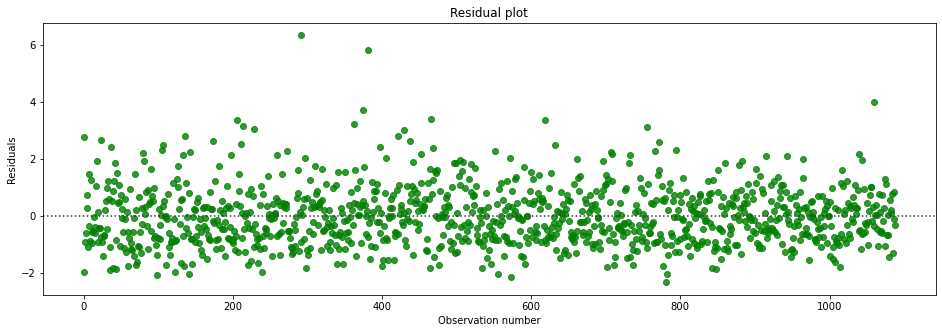

P-value: 0.5133922542943861
Nie ma istotnych dowodów na heteroskedastyczność reszt.


In [61]:
plt.figure(figsize=(16,5))
sns.residplot(x=np.arange(len(model.resid)), y=model.resid, lowess=False, color="g")
plt.title('Residual plot')
plt.xlabel('Observation number')
plt.ylabel('Residuals')
plt.show()

_, p_value, _, _ = het_breuschpagan(model.resid, X)
print(f'P-value: {p_value}')

# Interpretacja wyników testu
alpha = 0.05
if p_value > alpha:
    print('Nie ma istotnych dowodów na heteroskedastyczność reszt.')
else:
    print('Wykryto istotne dowody na heteroskedastyczność reszt.')

<br>

## Test Shapiro-Wilka

In [62]:
residue = model.resid

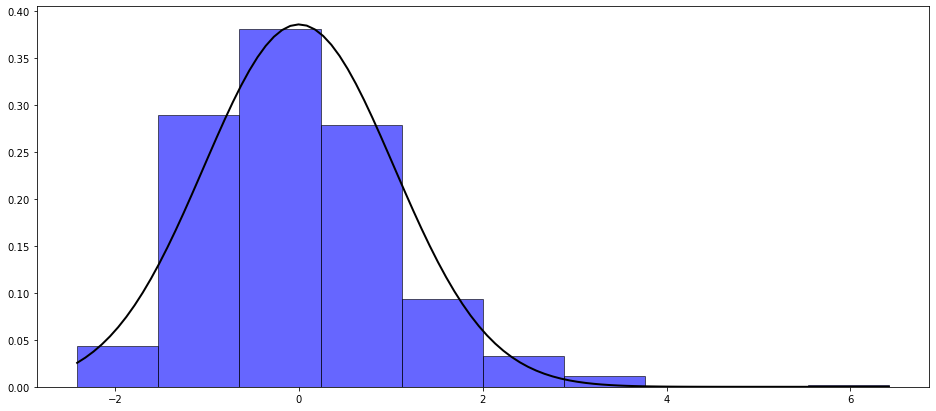

In [63]:
plt.figure(figsize=(16,7))
plt.hist(residue, bins=10, density=True, alpha=0.6, color='b', edgecolor='black')

# Wykres gęstości rozkładu normalnego
xmin, xmax = min(residue), max(residue)
x = np.linspace(xmin, xmax, 100)
mu, std = np.mean(residue), np.std(residue)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

In [64]:
from scipy import stats
shapiro_test_statistic, shapiro_p_value = stats.shapiro(residue)
print(f'Statystyka testu Shapiro-Wilka: {shapiro_test_statistic}')
print(f'Wartość P-Value: {shapiro_p_value}')

Statystyka testu Shapiro-Wilka: 0.9575032591819763
Wartość P-Value: 3.008354640948385e-17


In [65]:
jb = sms.jarque_bera(model.resid)
print("Statystyka testu Jarque-Bera:", jb[0])
print("Wartość P-Value:", jb[1])

Statystyka testu Jarque-Bera: 440.79531328481534
Wartość P-Value: 1.9165223832835053e-96


<br>

In [66]:
data_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1089 entries, 0 to 1580
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Yrs     1089 non-null   float64
 1   Const   1089 non-null   int64  
 2   Pk      1089 non-null   int64  
 3   G       1089 non-null   float64
 4   TOTMP   1089 non-null   float64
 5   TOTPTS  1089 non-null   float64
 6   TOTTRB  1089 non-null   float64
 7   TOTAST  1089 non-null   float64
 8   FG%     1089 non-null   float64
 9   3P%     1089 non-null   float64
 10  FT%     1089 non-null   float64
 11  WS/48   1089 non-null   float64
 12  BPM     1089 non-null   float64
 13  VORP    1089 non-null   float64
 14  MPG     1089 non-null   float64
 15  PPG     1089 non-null   float64
 16  RPG     1089 non-null   float64
 17  APG     1089 non-null   float64
 18  Height  1089 non-null   float64
 19  Weight  1089 non-null   Float64
dtypes: Float64(1), float64(17), int64(2)
memory usage: 179.7 KB


In [67]:
data_matrix.corr().style.applymap(highlight_high_corr)

,Yrs,Const,Pk,G,TOTMP,TOTPTS,TOTTRB,TOTAST,FG%,3P%,FT%,WS/48,BPM,VORP,MPG,PPG,RPG,APG,Height,Weight
Yrs,1.000000,nan,-0.457267,0.972842,0.913516,0.825839,0.801196,0.674462,0.404390,0.184770,0.243334,0.508698,0.574830,0.619088,0.773774,0.683119,0.609713,0.477948,0.024249,0.112181
Const,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Pk,-0.457267,nan,1.000000,-0.466756,-0.490256,-0.483405,-0.454901,-0.370497,-0.221541,-0.093182,-0.129903,-0.243554,-0.300402,-0.357921,-0.529916,-0.518731,-0.443255,-0.313912,-0.042922,-0.130483
G,0.972842,nan,-0.466756,1.000000,0.957775,0.870933,0.830890,0.723363,0.390052,0.200675,0.267136,0.506918,0.586378,0.662863,0.809705,0.718800,0.619416,0.520772,0.008366,0.086817
TOTMP,0.913516,nan,-0.490256,0.957775,1.000000,0.955797,0.856596,0.807439,0.329807,0.226356,0.285739,0.486096,0.604175,0.788378,0.868239,0.819447,0.634300,0.614254,-0.002792,0.044415
TOTPTS,0.825839,nan,-0.483405,0.870933,0.955797,1.000000,0.815652,0.805214,0.295048,0.241526,0.305864,0.471038,0.603127,0.866184,0.836521,0.892399,0.601983,0.625374,-0.002894,0.038069
TOTTRB,0.801196,nan,-0.454901,0.830890,0.856596,0.815652,1.000000,0.530630,0.455687,0.002492,0.077491,0.492278,0.532899,0.713649,0.722448,0.679522,0.870007,0.325254,0.084220,0.317770
TOTAST,0.674462,nan,-0.370497,0.723363,0.807439,0.805214,0.530630,1.000000,0.129568,0.273156,0.313121,0.359197,0.524696,0.784208,0.699950,0.695750,0.305582,0.886307,-0.170284,-0.214330
FG%,0.404390,nan,-0.221541,0.390052,0.329807,0.295048,0.455687,0.129568,1.000000,-0.068643,-0.086308,0.733803,0.579959,0.221669,0.352006,0.324794,0.568740,0.032015,0.108455,0.397973
3P%,0.184770,nan,-0.093182,0.200675,0.226356,0.241526,0.002492,0.273156,-0.068643,1.000000,0.403928,0.195477,0.363645,0.189570,0.291714,0.312363,-0.129097,0.349034,-0.127242,-0.389573


<br>

#### Logarytmowanie y

In [68]:
df['Yrs'] = np.log(df['Yrs'])

<br>

## Ponowna estymacja (z wartościami zlogarytmowanymi)

In [69]:
new_order = ['Yrs'] + [col for col in df.columns if col != 'Yrs']
df = df[new_order]
data_matrix_1 = df.drop(columns=['Tm', 'Player', 'Birth Date'])
data_matrix_1.insert(1, 'Const', 1)

In [70]:
y1 = data_matrix_1['Yrs'].to_numpy()

In [71]:
X1 = data_matrix_1.iloc[:, 1:].values
X1 = X1.astype(float)

In [72]:
# Utworzenie modelu regresji liniowej
model1 = sm.OLS(y1, X1).fit()

In [73]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     413.3
Date:                Tue, 19 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:25:57   Log-Likelihood:                -159.86
No. Observations:                1089   AIC:                             357.7
Df Residuals:                    1070   BIC:                             452.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1333      0.225     -0.592      0.554      -0.575       0.308
x1            -0.0028      0.001     -4.241      0.000      -0.004      -0.002
x2             0.0039      0.000     32.443      0.000       0.004       0.004
x3         -8.406e-05   9.42e-06     -8.924      0.000      -0.000   -6.56e-05
x4          3.477e-06   1.46e-05      0.238      0.812   -2.53e-05    3.22e-05
x5         -5.823e-05   2.18e-05     -2.674      0.008      -0.000   -1.55e-05
x6          7.464e-06   3.04e-05      0.246      0.806   -5.22e-05    6.71e-05
x7             0.5435      0.245      2.218      0.027       0.063       1.024
x8             0.1437      0.084      1.716      0.086      -0.021       0.308
x9            -0.3493      0.103     -3.390      0.001      -0.552      -0.147
x10           -0.0047      0.429     -0.011      0.991      -0.847       0.838
x11           -0.0005      0.010     -0.051      0.959      -0.020       0.019
x12            0.0022      0.002      1.108      0.268      -0.002       0.006
x13            0.0247      0.006      4.244      0.000       0.013       0.036
x14            0.0142      0.010      1.354      0.176      -0.006       0.035
x15            0.0329      0.017      1.888      0.059      -0.001       0.067
x16            0.0077      0.023      0.337      0.736      -0.037       0.053
x17            0.0024      0.001      2.650      0.008       0.001       0.004
x18            0.0006      0.001      0.501      0.617      -0.002       0.003
==============================================================================
Omnibus:                       87.340   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              222.704
Skew:                          -0.439   Prob(JB):                     4.37e-49
Kurtosis:                       5.034   Cond. No.                     8.95e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.95e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
model1.resid.max()

1.1240455331415833

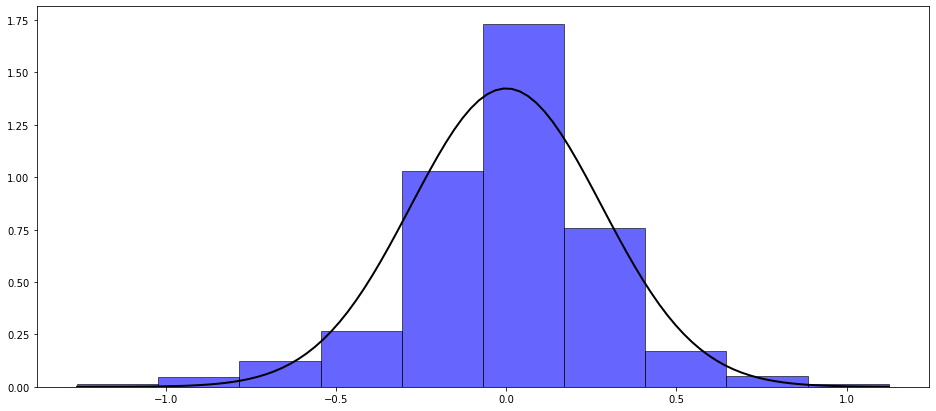

In [75]:
plt.figure(figsize=(16,7))
plt.hist(model1.resid, bins=10, density=True, alpha=0.6, color='b', edgecolor='black')

# Wykres gęstości rozkładu normalnego
xmin, xmax = min(model1.resid), max(model1.resid)
x = np.linspace(xmin, xmax, 100)
mu, std = np.mean(model1.resid), np.std(model1.resid)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

In [76]:
shapiro_test_statistic, shapiro_p_value = stats.shapiro(model1.resid)
print(f'Statystyka testu Shapiro-Wilka: {shapiro_test_statistic}')
print(f'Wartość P-Value: {shapiro_p_value}')

Statystyka testu Shapiro-Wilka: 0.9665189981460571
Wartość P-Value: 3.852020817525807e-15


<br>

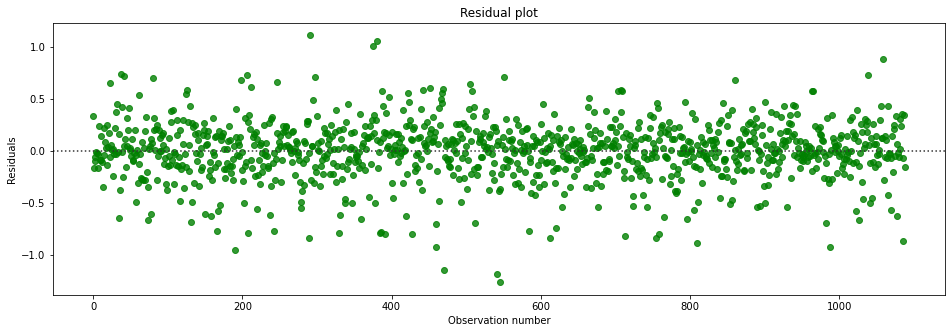

P-value: 7.034222474463472e-30
Wykryto istotne dowody na heteroskedastyczność reszt.


In [77]:
plt.figure(figsize=(16,5))
sns.residplot(x=np.arange(len(model1.resid)), y=model1.resid, lowess=False, color="g")
plt.title('Residual plot')
plt.xlabel('Observation number')
plt.ylabel('Residuals')
plt.show()

_, p_value, _, _ = het_breuschpagan(model1.resid, X1)
print(f'P-value: {p_value}')

# Interpretacja wyników testu
alpha = 0.05
if p_value > alpha:
    print('Nie ma istotnych dowodów na heteroskedastyczność reszt.')
else:
    print('Wykryto istotne dowody na heteroskedastyczność reszt.')

In [78]:
lm, lm_pvalue, fvalue, f_pvalue = sm.stats.diagnostic.het_white(model.resid, X1)

print("Lagrange multiplier statistic: " + str(lm))
print("Lagrange multiplier p-value:   " + str(lm_pvalue))
print("F-statistic:                   " + str(fvalue))
print("P-value of F-statistic:        " + str(f_pvalue))

# If the p-value is less than the chosen significance level (e.g. 0.05), 
# reject the null hypothesis of homoscedasticity
if lm_pvalue < 0.05:
    print("Rejected the null hypothesis. Heteroskedasticity detected")
else:
    print("Failed to reject the null hypothesis. No heteroskedasticity detected.")

Lagrange multiplier statistic: 166.34512186214795
Lagrange multiplier p-value:   0.8811389194695236
F-statistic:                   0.8575682129291984
P-value of F-statistic:        0.9048443125215926
Failed to reject the null hypothesis. No heteroskedasticity detected.


In [79]:
sm.stats.diagnostic.het_goldfeldquandt(y, X, drop=0.2)

(0.5894522354898084, 0.9999999449967831, 'increasing')

In [80]:
data_matrix_1.corr().style.applymap(highlight_high_corr)

,Yrs,Const,Pk,G,TOTMP,TOTPTS,TOTTRB,TOTAST,FG%,3P%,FT%,WS/48,BPM,VORP,MPG,PPG,RPG,APG,Height,Weight
Yrs,1.000000,nan,-0.475895,0.886720,0.796079,0.703741,0.691907,0.569124,0.460166,0.192897,0.216476,0.509976,0.559194,0.478238,0.757391,0.649141,0.597231,0.434566,0.054062,0.134268
Const,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Pk,-0.475895,nan,1.000000,-0.466756,-0.490256,-0.483405,-0.454901,-0.370497,-0.221541,-0.093182,-0.129903,-0.243554,-0.300402,-0.357921,-0.529916,-0.518731,-0.443255,-0.313912,-0.042922,-0.130483
G,0.886720,nan,-0.466756,1.000000,0.957775,0.870933,0.830890,0.723363,0.390052,0.200675,0.267136,0.506918,0.586378,0.662863,0.809705,0.718800,0.619416,0.520772,0.008366,0.086817
TOTMP,0.796079,nan,-0.490256,0.957775,1.000000,0.955797,0.856596,0.807439,0.329807,0.226356,0.285739,0.486096,0.604175,0.788378,0.868239,0.819447,0.634300,0.614254,-0.002792,0.044415
TOTPTS,0.703741,nan,-0.483405,0.870933,0.955797,1.000000,0.815652,0.805214,0.295048,0.241526,0.305864,0.471038,0.603127,0.866184,0.836521,0.892399,0.601983,0.625374,-0.002894,0.038069
TOTTRB,0.691907,nan,-0.454901,0.830890,0.856596,0.815652,1.000000,0.530630,0.455687,0.002492,0.077491,0.492278,0.532899,0.713649,0.722448,0.679522,0.870007,0.325254,0.084220,0.317770
TOTAST,0.569124,nan,-0.370497,0.723363,0.807439,0.805214,0.530630,1.000000,0.129568,0.273156,0.313121,0.359197,0.524696,0.784208,0.699950,0.695750,0.305582,0.886307,-0.170284,-0.214330
FG%,0.460166,nan,-0.221541,0.390052,0.329807,0.295048,0.455687,0.129568,1.000000,-0.068643,-0.086308,0.733803,0.579959,0.221669,0.352006,0.324794,0.568740,0.032015,0.108455,0.397973
3P%,0.192897,nan,-0.093182,0.200675,0.226356,0.241526,0.002492,0.273156,-0.068643,1.000000,0.403928,0.195477,0.363645,0.189570,0.291714,0.312363,-0.129097,0.349034,-0.127242,-0.389573


<br>

### Badanie korelacji logarytmów kwadratów reszt MNK  z jego zmiennymi objaśniającym

In [81]:
residue = np.log(np.square(model1.resid))

In [82]:
data_matrix_1['ln(eps^2)'] = residue
corr_matrix = data_matrix_1.iloc[:, 2:]
order = ['ln(eps^2)'] + [col for col in corr_matrix.columns if col != 'ln(eps^2)']
corr_matrix = corr_matrix[order]
corr_matrix.corr().style.applymap(highlight_high_corr)

,ln(eps^2),Pk,G,TOTMP,TOTPTS,TOTTRB,TOTAST,FG%,3P%,FT%,WS/48,BPM,VORP,MPG,PPG,RPG,APG,Height,Weight
ln(eps^2),1.000000,0.234101,-0.228825,-0.219954,-0.211067,-0.191864,-0.154285,-0.150971,-0.048951,-0.034845,-0.125599,-0.164025,-0.122594,-0.269590,-0.251830,-0.214927,-0.147006,-0.093641,-0.043656
Pk,0.234101,1.000000,-0.466756,-0.490256,-0.483405,-0.454901,-0.370497,-0.221541,-0.093182,-0.129903,-0.243554,-0.300402,-0.357921,-0.529916,-0.518731,-0.443255,-0.313912,-0.042922,-0.130483
G,-0.228825,-0.466756,1.000000,0.957775,0.870933,0.830890,0.723363,0.390052,0.200675,0.267136,0.506918,0.586378,0.662863,0.809705,0.718800,0.619416,0.520772,0.008366,0.086817
TOTMP,-0.219954,-0.490256,0.957775,1.000000,0.955797,0.856596,0.807439,0.329807,0.226356,0.285739,0.486096,0.604175,0.788378,0.868239,0.819447,0.634300,0.614254,-0.002792,0.044415
TOTPTS,-0.211067,-0.483405,0.870933,0.955797,1.000000,0.815652,0.805214,0.295048,0.241526,0.305864,0.471038,0.603127,0.866184,0.836521,0.892399,0.601983,0.625374,-0.002894,0.038069
TOTTRB,-0.191864,-0.454901,0.830890,0.856596,0.815652,1.000000,0.530630,0.455687,0.002492,0.077491,0.492278,0.532899,0.713649,0.722448,0.679522,0.870007,0.325254,0.084220,0.317770
TOTAST,-0.154285,-0.370497,0.723363,0.807439,0.805214,0.530630,1.000000,0.129568,0.273156,0.313121,0.359197,0.524696,0.784208,0.699950,0.695750,0.305582,0.886307,-0.170284,-0.214330
FG%,-0.150971,-0.221541,0.390052,0.329807,0.295048,0.455687,0.129568,1.000000,-0.068643,-0.086308,0.733803,0.579959,0.221669,0.352006,0.324794,0.568740,0.032015,0.108455,0.397973
3P%,-0.048951,-0.093182,0.200675,0.226356,0.241526,0.002492,0.273156,-0.068643,1.000000,0.403928,0.195477,0.363645,0.189570,0.291714,0.312363,-0.129097,0.349034,-0.127242,-0.389573
FT%,-0.034845,-0.129903,0.267136,0.285739,0.305864,0.077491,0.313121,-0.086308,0.403928,1.000000,0.203103,0.267845,0.221499,0.348767,0.379635,-0.039158,0.360427,-0.116026,-0.312394


In [83]:
data_matrix_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1089 entries, 0 to 1580
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Yrs        1089 non-null   float64
 1   Const      1089 non-null   int64  
 2   Pk         1089 non-null   int64  
 3   G          1089 non-null   float64
 4   TOTMP      1089 non-null   float64
 5   TOTPTS     1089 non-null   float64
 6   TOTTRB     1089 non-null   float64
 7   TOTAST     1089 non-null   float64
 8   FG%        1089 non-null   float64
 9   3P%        1089 non-null   float64
 10  FT%        1089 non-null   float64
 11  WS/48      1089 non-null   float64
 12  BPM        1089 non-null   float64
 13  VORP       1089 non-null   float64
 14  MPG        1089 non-null   float64
 15  PPG        1089 non-null   float64
 16  RPG        1089 non-null   float64
 17  APG        1089 non-null   float64
 18  Height     1089 non-null   float64
 19  Weight     1089 non-null   Float64
 20  ln(eps^2

<br>

## Budowa pomocniczego modelu

In [84]:
d = [0, 7, 8, 9, 10, 11, 12, 13, 17, 18, 19]
auxiliary_matrix = data_matrix_1.drop(data_matrix_1.columns[d], axis=1)

In [85]:
order1 = ['ln(eps^2)'] + [col for col in auxiliary_matrix.columns if col != 'ln(eps^2)']
auxiliary_matrix = auxiliary_matrix[order1]
auxiliary_matrix

,ln(eps^2),Const,Pk,G,TOTMP,TOTPTS,TOTTRB,MPG,PPG,RPG
0,-2.030747,1,1,781.0,25903.0,12884.0,7232.0,33.2,16.5,9.3
1,-4.034548,1,2,1335.0,47117.0,21813.0,5269.0,35.3,16.3,3.9
2,-5.565345,1,3,586.0,15628.0,8553.0,1087.0,26.7,14.6,1.9
3,-7.010193,1,4,629.0,17983.0,8094.0,1774.0,28.6,12.9,2.8
4,-7.509341,1,5,966.0,29481.0,12914.0,4002.0,30.5,13.4,4.1
...,...,...,...,...,...,...,...,...,...,...
1571,-2.220602,1,51,116.0,1044.0,325.0,227.0,9.0,2.8,2.0
1575,-0.239354,1,55,64.0,973.0,183.0,87.0,15.2,2.9,1.4
1576,-4.764214,1,56,44.0,457.0,97.0,69.0,10.4,2.2,1.6
1578,-2.312615,1,58,123.0,1696.0,846.0,225.0,13.8,6.9,1.8


In [86]:
y2 = auxiliary_matrix['ln(eps^2)']

X2 = auxiliary_matrix.iloc[:, 1:].values
X2 = X2.astype(float)

In [87]:
auxiliary_model = sm.OLS(y2, X2).fit()

In [88]:
auxiliary_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ln(eps^2)   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     14.56
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           2.48e-20
Time:                        15:25:59   Log-Likelihood:                -2512.2
No. Observations:                1089   AIC:                             5042.
Df Residuals:                    1080   BIC:                             5087.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0067      0.376     -8.003      0.000      -3.744      -2.270
x1             0.0190      0.006      3.358      0.001       0.008       0.030
x2            -0.0027      0.001     -2.972      0.003      -0.005      -0.001
x3          8.804e-05   7.04e-05      1.250      0.212   -5.02e-05       0.000
x4         -2.658e-05      0.000     -0.242      0.809      -0.000       0.000
x5             0.0002      0.000      1.396      0.163   -8.43e-05       0.001
x6            -0.0417      0.044     -0.940      0.347      -0.129       0.045
x7            -0.0455      0.083     -0.548      0.584      -0.208       0.117
x8            -0.1786      0.110     -1.628      0.104      -0.394       0.037
==============================================================================
Omnibus:                      510.047   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3442.457
Skew:                          -2.053   Prob(JB):                         0.00
Kurtosis:                      10.682   Cond. No.                     8.60e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [89]:
sigma = np.exp(np.dot(X2, auxiliary_model.params))

In [90]:
data_matrix_1['sigma^2'] = sigma
data_matrix_1

,Yrs,Const,Pk,G,TOTMP,TOTPTS,TOTTRB,TOTAST,FG%,3P%,...,BPM,VORP,MPG,PPG,RPG,APG,Height,Weight,ln(eps^2),sigma^2
0,2.708050,1,1,781.0,25903.0,12884.0,7232.0,1985.0,0.447,0.295,...,1.4,22.3,33.2,16.5,9.3,2.5,186.0,104.0,-2.030747,0.004161
1,2.833213,1,2,1335.0,47117.0,21813.0,5269.0,8966.0,0.466,0.317,...,3.3,62.5,35.3,16.3,3.9,6.7,195.0,82.0,-4.034548,0.007659
2,2.197225,1,3,586.0,15628.0,8553.0,1087.0,2079.0,0.442,0.354,...,-0.8,4.5,26.7,14.6,1.9,3.5,186.0,73.0,-5.565345,0.005005
3,2.302585,1,4,629.0,17983.0,8094.0,1774.0,1296.0,0.417,0.397,...,0.2,9.9,28.6,12.9,2.8,2.1,207.0,104.0,-7.010193,0.005536
4,2.708050,1,5,966.0,29481.0,12914.0,4002.0,2945.0,0.434,0.300,...,0.1,15.8,30.5,13.4,4.1,3.0,198.0,88.0,-7.509341,0.006175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571,1.386294,1,51,116.0,1044.0,325.0,227.0,80.0,0.491,0.157,...,-3.7,-0.5,9.0,2.8,2.0,0.7,201.0,99.0,-2.220602,0.045783
1575,0.000000,1,55,64.0,973.0,183.0,87.0,130.0,0.345,0.190,...,-5.1,-0.8,15.2,2.9,1.4,2.0,192.0,86.0,-0.239354,0.047220
1576,0.693147,1,56,44.0,457.0,97.0,69.0,29.0,0.304,0.222,...,-5.5,-0.4,10.4,2.2,1.6,0.7,201.0,91.0,-4.764214,0.059033
1578,1.386294,1,58,123.0,1696.0,846.0,225.0,167.0,0.417,0.355,...,-2.1,0.0,13.8,6.9,1.8,1.4,198.0,81.0,-2.312615,0.037714


In [91]:
columns_to_skip = [1,-1]

data_matrix_2 = data_matrix_1.copy()

for i, col in enumerate(data_matrix.columns):
    if i not in columns_to_skip:
        data_matrix_2[col] = data_matrix_2[col] / np.sqrt(data_matrix_2['sigma^2'])

In [92]:
# Macierz ważona
data_matrix_2 = data_matrix_2.iloc[:, :-2]
data_matrix_2

,Yrs,Const,Pk,G,TOTMP,TOTPTS,TOTTRB,TOTAST,FG%,3P%,FT%,WS/48,BPM,VORP,MPG,PPG,RPG,APG,Height,Weight
0,41.980123,1,15.501974,12107.041379,401547.622070,199727.427817,112110.273050,30771.417589,6.929382,4.573082,11.921018,1.844735,21.702763,345.694011,514.665523,255.782564,144.168354,38.754934,2883.367089,1612.205254
1,32.374405,1,22.853489,15254.703829,538393.917821,249251.576489,60207.516459,102452.190657,5.324863,3.622278,8.330097,1.691158,37.708257,714.171528,403.364079,186.255934,44.564303,76.559188,2228.215166,936.993044
2,31.059111,1,42.406831,8283.467739,220911.320518,120901.876401,15365.408587,29387.934179,6.247940,5.004006,12.792727,1.088442,-11.308488,63.610247,377.420800,206.379913,26.857660,49.474637,2629.223549,1031.899565
3,30.946866,1,53.760212,8453.793330,241692.472894,108783.788890,23842.654002,17418.308673,5.604502,5.335701,10.657962,1.196165,2.688011,133.056525,384.385515,173.376684,37.632148,28.224111,2782.090969,1397.765511
4,34.462905,1,63.630477,12293.408125,375178.017534,164344.795578,50929.833661,37478.350858,5.523125,3.817829,9.595476,0.992635,1.272610,201.072307,388.145909,170.529678,52.176991,38.178286,2519.766883,1119.896392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571,6.478934,1,238.351720,542.133325,4879.199924,1518.908022,1060.898834,373.885052,2.294720,0.733749,2.439600,0.289761,-17.292184,-2.336782,42.062068,13.085977,9.347126,3.271494,939.386192,462.682751
1575,0.000000,1,253.103289,294.520191,4477.627274,842.143670,400.363384,598.244137,1.587648,0.874357,2.521829,0.027611,-23.469578,-3.681502,69.948545,13.345446,6.442629,9.203756,883.560572,395.761506
1576,2.852851,1,230.484491,181.094957,1880.918077,399.232064,283.989819,119.358040,1.251202,0.913706,1.543423,-0.115242,-22.636870,-1.646318,42.804263,9.054748,6.585271,2.881056,827.274690,374.537298
1578,7.138466,1,298.660260,633.365723,8733.237939,4356.320340,1158.595835,859.935575,2.147264,1.828007,3.975271,0.247167,-10.813561,0.000000,71.060545,35.530272,9.268767,7.209041,1019.564335,417.094501


In [93]:
auxiliary_model_resid = auxiliary_model.resid / np.sqrt(data_matrix_1['sigma^2'])
auxiliary_model_resid

0       53.500217
1        9.568363
2       -3.787647
3      -24.376413
4      -30.823002
          ...    
1571     4.034416
1575    12.947727
1576    -7.962212
1578     4.969665
1580    -1.845145
Length: 1089, dtype: float64

<br>

## Ważona metoda najmniejszych kwadratów

In [94]:
y3 = data_matrix_2['Yrs'].to_numpy()

In [95]:
X3 = data_matrix_2.iloc[:, 1:].values
X3 = X3.astype(float)

In [96]:
model2 = sm.OLS(y3, X3).fit()

In [97]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     2084.
Date:                Tue, 19 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:25:59   Log-Likelihood:                -2262.6
No. Observations:                1089   AIC:                             4563.
Df Residuals:                    1070   BIC:                             4658.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0149      0.605     -3.328      0.001      -3.203      -0.827
x1             0.0003      0.001      0.394      0.694      -0.001       0.002
x2             0.0028      0.000     18.470      0.000       0.002       0.003
x3         -5.868e-05   8.23e-06     -7.133      0.000   -7.48e-05   -4.25e-05
x4          2.066e-05   9.81e-06      2.107      0.035    1.42e-06    3.99e-05
x5          3.927e-06   1.54e-05      0.254      0.799   -2.64e-05    3.42e-05
x6         -7.391e-06    2.2e-05     -0.336      0.737   -5.06e-05    3.58e-05
x7             0.7820      0.205      3.811      0.000       0.379       1.185
x8             0.1588      0.069      2.317      0.021       0.024       0.293
x9            -0.0694      0.097     -0.712      0.477      -0.261       0.122
x10            0.2206      0.396      0.557      0.578      -0.557       0.998
x11            0.0055      0.009      0.581      0.561      -0.013       0.024
x12           -0.0016      0.001     -1.139      0.255      -0.004       0.001
x13            0.0279      0.005      5.422      0.000       0.018       0.038
x14           -0.0149      0.007     -2.164      0.031      -0.028      -0.001
x15           -0.0139      0.012     -1.128      0.260      -0.038       0.010
x16            0.0233      0.017      1.358      0.175      -0.010       0.057
x17            0.0024      0.001      3.926      0.000       0.001       0.004
x18            0.0016      0.001      1.950      0.051      -1e-05       0.003
==============================================================================
Omnibus:                      159.017   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              435.042
Skew:                          -0.761   Prob(JB):                     3.40e-95
Kurtosis:                       5.697   Cond. No.                     2.16e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [98]:
from statsmodels.stats.diagnostic import het_goldfeldquandt
het_test_stat, het_p_value, _ = het_goldfeldquandt(model2.resid, X3)

print(f"Test Statistic: {het_test_stat}")
print(f"P-value: {het_p_value}")

if het_p_value > 0.05:
    print("Nie ma istotnych dowodów na heteroskedastyczność.")
else:
    print("Istnieją istotne dowody na heteroskedastyczność.")

Test Statistic: 0.7672459193865135
P-value: 0.9987804052837999
Nie ma istotnych dowodów na heteroskedastyczność.


In [99]:
bp_test = het_breuschpagan(model2.resid, X3)

print("Test Breuscha-Pagana:")
print(f"F-statistic: {bp_test[0]}")
print(f"P-value: {bp_test[1]}")

Test Breuscha-Pagana:
F-statistic: 65.81719045069532
P-value: 2.274201437297942e-07


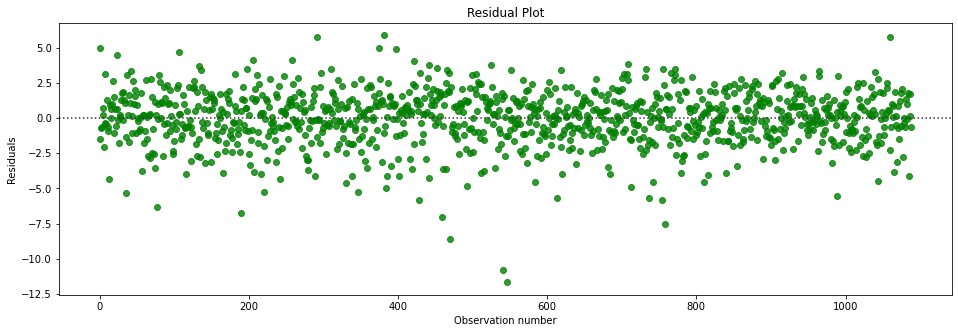

P-value: 2.274201437297942e-07
Wykryto istotne dowody na heteroskedastyczność reszt.


In [100]:
plt.figure(figsize=(16,5))
sns.residplot(x=np.arange(len(model2.resid)), y=model2.resid, lowess=False, color="g")
plt.title('Residual Plot')
plt.xlabel('Observation number')
plt.ylabel('Residuals')
plt.show()

_, p_value, _, _ = het_breuschpagan(model2.resid, X3)
print(f'P-value: {p_value}')

# Interpretacja wyników testu
alpha = 0.05
if p_value > alpha:
    print('Nie ma istotnych dowodów na heteroskedastyczność reszt.')
else:
    print('Wykryto istotne dowody na heteroskedastyczność reszt.')

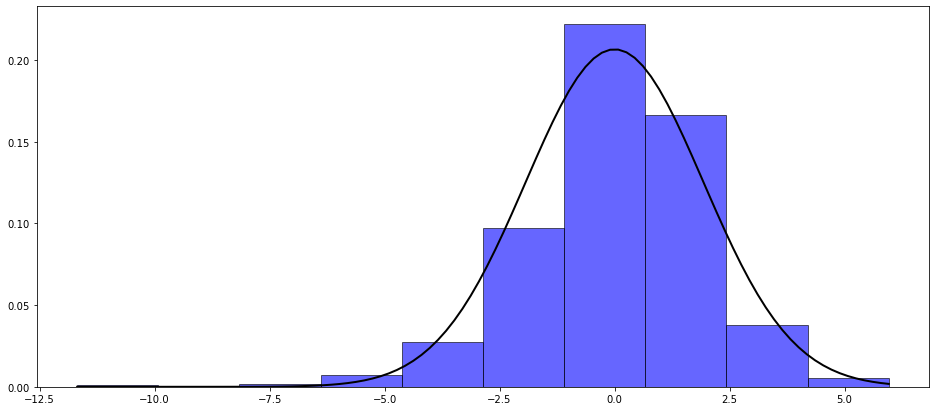

In [101]:
plt.figure(figsize=(16,7))
plt.hist(model2.resid, bins=10, density=True, alpha=0.6, color='b', edgecolor='black')

# Wykres gęstości rozkładu normalnego
xmin, xmax = min(model2.resid), max(model2.resid)
x = np.linspace(xmin, xmax, 100)
mu, std = np.mean(model2.resid), np.std(model2.resid)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

In [102]:
shapiro_test_statistic, shapiro_p_value = stats.shapiro(model2.resid)
print(f'Statystyka testu Shapiro-Wilka: {shapiro_test_statistic}')
print(f'Wartość P-Value: {shapiro_p_value}')

Statystyka testu Shapiro-Wilka: 0.9691098928451538
Wartość P-Value: 1.8347214752242186e-14


In [103]:
data_matrix.corr().style.applymap(highlight_high_corr)

,Yrs,Const,Pk,G,TOTMP,TOTPTS,TOTTRB,TOTAST,FG%,3P%,FT%,WS/48,BPM,VORP,MPG,PPG,RPG,APG,Height,Weight
Yrs,1.000000,nan,-0.457267,0.972842,0.913516,0.825839,0.801196,0.674462,0.404390,0.184770,0.243334,0.508698,0.574830,0.619088,0.773774,0.683119,0.609713,0.477948,0.024249,0.112181
Const,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Pk,-0.457267,nan,1.000000,-0.466756,-0.490256,-0.483405,-0.454901,-0.370497,-0.221541,-0.093182,-0.129903,-0.243554,-0.300402,-0.357921,-0.529916,-0.518731,-0.443255,-0.313912,-0.042922,-0.130483
G,0.972842,nan,-0.466756,1.000000,0.957775,0.870933,0.830890,0.723363,0.390052,0.200675,0.267136,0.506918,0.586378,0.662863,0.809705,0.718800,0.619416,0.520772,0.008366,0.086817
TOTMP,0.913516,nan,-0.490256,0.957775,1.000000,0.955797,0.856596,0.807439,0.329807,0.226356,0.285739,0.486096,0.604175,0.788378,0.868239,0.819447,0.634300,0.614254,-0.002792,0.044415
TOTPTS,0.825839,nan,-0.483405,0.870933,0.955797,1.000000,0.815652,0.805214,0.295048,0.241526,0.305864,0.471038,0.603127,0.866184,0.836521,0.892399,0.601983,0.625374,-0.002894,0.038069
TOTTRB,0.801196,nan,-0.454901,0.830890,0.856596,0.815652,1.000000,0.530630,0.455687,0.002492,0.077491,0.492278,0.532899,0.713649,0.722448,0.679522,0.870007,0.325254,0.084220,0.317770
TOTAST,0.674462,nan,-0.370497,0.723363,0.807439,0.805214,0.530630,1.000000,0.129568,0.273156,0.313121,0.359197,0.524696,0.784208,0.699950,0.695750,0.305582,0.886307,-0.170284,-0.214330
FG%,0.404390,nan,-0.221541,0.390052,0.329807,0.295048,0.455687,0.129568,1.000000,-0.068643,-0.086308,0.733803,0.579959,0.221669,0.352006,0.324794,0.568740,0.032015,0.108455,0.397973
3P%,0.184770,nan,-0.093182,0.200675,0.226356,0.241526,0.002492,0.273156,-0.068643,1.000000,0.403928,0.195477,0.363645,0.189570,0.291714,0.312363,-0.129097,0.349034,-0.127242,-0.389573


<br>

In [104]:
#data_matrix_1.to_excel('ww.xlsx', index=False, engine='openpyxl')

In [105]:
#data_matrix_2.to_excel('ww2.xlsx', index=False, engine='openpyxl')

In [106]:
#data.to_excel('data_nba.xlsx', index=False, engine='openpyxl')

<br>

## Redukcja modelu podstawowego

In [107]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1179.
Date:                Tue, 19 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:26:00   Log-Likelihood:                -1583.0
No. Observations:                1089   AIC:                             3204.
Df Residuals:                    1070   BIC:                             3299.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0535      0.832      1.267      0.206      -0.578       2.685
x1            -0.0029      0.002     -1.185      0.236      -0.008       0.002
x2             0.0174      0.000     38.756      0.000       0.016       0.018
x3            -0.0001   3.48e-05     -4.194      0.000      -0.000   -7.76e-05
x4          1.871e-05   5.41e-05      0.346      0.729   -8.74e-05       0.000
x5         -3.386e-05   8.05e-05     -0.421      0.674      -0.000       0.000
x6          -6.55e-05      0.000     -0.583      0.560      -0.000       0.000
x7            -0.7095      0.905     -0.784      0.433      -2.486       1.067
x8            -0.0362      0.309     -0.117      0.907      -0.643       0.571
x9            -0.6854      0.381     -1.800      0.072      -1.432       0.062
x10            1.0537      1.586      0.664      0.507      -2.059       4.166
x11            0.0021      0.037      0.057      0.955      -0.071       0.075
x12            0.0094      0.007      1.281      0.200      -0.005       0.024
x13            0.0012      0.021      0.056      0.955      -0.041       0.043
x14            0.0304      0.039      0.786      0.432      -0.046       0.106
x15            0.0128      0.064      0.199      0.842      -0.113       0.139
x16            0.0303      0.085      0.358      0.721      -0.136       0.196
x17            0.0038      0.003      1.147      0.251      -0.003       0.010
x18            0.0040      0.004      0.935      0.350      -0.004       0.012
==============================================================================
Omnibus:                      191.944   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              440.795
Skew:                           0.970   Prob(JB):                     1.92e-96
Kurtosis:                       5.439   Cond. No.                     8.95e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.95e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Test na łączną istotność parametrów

In [108]:
f_statistic = model.fvalue
p_value = model.f_pvalue

print(f'Wartość statystyki F: {f_statistic}')
print(f'Wartość p: {p_value}')

Wartość statystyki F: 1178.6251910664384
Wartość p: 0.0


<br>

##### Redukcja modelu (w pierwszym kroku pozbycie się zmiennych o p-value > 0,7)

In [109]:
significant = np.where(model.pvalues <= 0.7)[0]

In [110]:
X_reduced = X[:, significant]

In [111]:
model_reduced = sm.OLS(y, X_reduced).fit()

In [112]:
model_reduced.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1777.
Date:                Tue, 19 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:26:00   Log-Likelihood:                -1583.1
No. Observations:                1089   AIC:                             3192.
Df Residuals:                    1076   BIC:                             3257.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1428      0.743      1.538      0.124      -0.315       2.601
x1            -0.0029      0.002     -1.176      0.240      -0.008       0.002
x2             0.0174      0.000     39.386      0.000       0.016       0.018
x3            -0.0001   2.05e-05     -7.007      0.000      -0.000      -0.000
x4         -1.813e-05   4.15e-05     -0.437      0.662   -9.95e-05    6.32e-05
x5          -3.17e-05   5.46e-05     -0.580      0.562      -0.000    7.55e-05
x6            -0.7419      0.877     -0.846      0.398      -2.463       0.979
x7            -0.7212      0.358     -2.017      0.044      -1.423      -0.020
x8             1.1351      0.733      1.550      0.122      -0.302       2.572
x9             0.0098      0.005      1.790      0.074      -0.001       0.021
x10            0.0439      0.014      3.146      0.002       0.017       0.071
x11            0.0035      0.003      1.101      0.271      -0.003       0.010
x12            0.0039      0.004      1.119      0.264      -0.003       0.011
==============================================================================
Omnibus:                      192.848   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              445.244
Skew:                           0.972   Prob(JB):                     2.07e-97
Kurtosis:                       5.456   Cond. No.                     5.53e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.53e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [113]:
f_statistic = model_reduced.fvalue
p_value = model_reduced.f_pvalue

print(f'Wartość statystyki F: {f_statistic}')
print(f'Wartość p: {p_value}')

Wartość statystyki F: 1777.365365800167
Wartość p: 0.0


<br>

##### Redukcja modelu (w drugim kroku pozbycie się zmiennych o p-value > 0,5)

In [114]:
significant = np.where(model.pvalues <= 0.5)[0]

In [115]:
X_reduced = X[:, significant]

In [116]:
model_reduced = sm.OLS(y, X_reduced).fit()

In [117]:
model_reduced.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     2370.
Date:                Tue, 19 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:26:01   Log-Likelihood:                -1584.5
No. Observations:                1089   AIC:                             3189.
Df Residuals:                    1079   BIC:                             3239.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7060      0.679      1.040      0.299      -0.627       2.039
x1            -0.0026      0.002     -1.062      0.288      -0.007       0.002
x2             0.0174      0.000     39.769      0.000       0.017       0.018
x3            -0.0002   1.79e-05     -8.425      0.000      -0.000      -0.000
x4             0.1602      0.624      0.257      0.797      -1.064       1.384
x5            -0.5590      0.342     -1.636      0.102      -1.229       0.111
x6             0.0099      0.005      2.163      0.031       0.001       0.019
x7             0.0456      0.014      3.286      0.001       0.018       0.073
x8             0.0036      0.003      1.133      0.257      -0.003       0.010
x9             0.0036      0.003      1.115      0.265      -0.003       0.010
==============================================================================
Omnibus:                      192.531   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              442.882
Skew:                           0.972   Prob(JB):                     6.75e-97
Kurtosis:                       5.445   Cond. No.                     3.66e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.66e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [118]:
f_statistic = model_reduced.fvalue
p_value = model_reduced.f_pvalue

print(f'Wartość statystyki F: {f_statistic}')
print(f'Wartość p: {p_value}')

Wartość statystyki F: 2369.8740728908933
Wartość p: 0.0


In [119]:
# const
# x1 - pk
# x2 - g
# x3 - totmp
# x4 - totpts
# x9 - ft%
# x13 - mpg
# x18 - weight

<br>

In [120]:
X_reduced2 = data_matrix[['Pk', 'G', 'TOTMP', 'TOTPTS', 'FT%', 'Weight']]

In [121]:
X_reduced2 = X_reduced2.astype(float)

In [122]:
model_reduced2 = sm.OLS(y, sm.add_constant(X_reduced2)).fit()

In [123]:
model_reduced2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     3532.
Date:                Tue, 19 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:26:01   Log-Likelihood:                -1589.4
No. Observations:                1089   AIC:                             3193.
Df Residuals:                    1082   BIC:                             3228.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4306      0.425      3.364      0.001       0.596       2.265
Pk            -0.0040      0.002     -1.698      0.090      -0.009       0.001
G              0.0171      0.000     43.631      0.000       0.016       0.018
TOTMP         -0.0002   2.06e-05     -7.323      0.000      -0.000      -0.000
TOTPTS      7.387e-05   2.41e-05      3.063      0.002    2.65e-05       0.000
FT%           -0.3704      0.326     -1.135      0.257      -1.010       0.270
Weight         0.0052      0.003      1.866      0.062      -0.000       0.011
==============================================================================
Omnibus:                      187.188   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              410.809
Skew:                           0.965   Prob(JB):                     6.22e-90
Kurtosis:                       5.309   Cond. No.                     2.66e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [124]:
f_statistic = model_reduced2.fvalue
p_value = model_reduced2.f_pvalue

print(f'Wartość statystyki F: {f_statistic}')
print(f'Wartość p: {p_value}')

Wartość statystyki F: 3531.6026730446406
Wartość p: 0.0


<br>

In [125]:
X_reduced3 = data_matrix[['G', 'TOTMP', 'TOTPTS', 'FT%', 'Weight']]

In [126]:
X_reduced3 = X_reduced3.astype(float)

In [127]:
model_reduced3 = sm.OLS(y, sm.add_constant(X_reduced3)).fit()

In [128]:
model_reduced3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     4230.
Date:                Tue, 19 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:26:01   Log-Likelihood:                -1590.8
No. Observations:                1089   AIC:                             3194.
Df Residuals:                    1083   BIC:                             3224.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2322      0.409      3.011      0.003       0.429       2.035
G              0.0171      0.000     43.590      0.000       0.016       0.018
TOTMP         -0.0001   2.06e-05     -7.235      0.000      -0.000      -0.000
TOTPTS      7.579e-05   2.41e-05      3.143      0.002    2.85e-05       0.000
FT%           -0.3562      0.326     -1.091      0.275      -0.997       0.284
Weight         0.0058      0.003      2.093      0.037       0.000       0.011
==============================================================================
Omnibus:                      181.746   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              389.403
Skew:                           0.948   Prob(JB):                     2.77e-85
Kurtosis:                       5.233   Cond. No.                     2.60e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [129]:
f_statistic = model_reduced3.fvalue
p_value = model_reduced3.f_pvalue

print(f'Wartość statystyki F: {f_statistic}')
print(f'Wartość p: {p_value}')

Wartość statystyki F: 4229.9900975861065
Wartość p: 0.0


<br>

##### Redukcja modelu (w drugim kroku pozbycie się zmiennych o p-value > 0,5)

In [130]:
X1_reduced = data_matrix.drop(['Yrs', 'Const', 'VORP', 'WS/48', 'Weight', 'PPG', 'BPM', 'RPG', '3P%', 'APG', 'TOTAST', 'FT%'], axis=1)

In [131]:
X1_reduced = X1_reduced.astype(float)

In [132]:
model1_reduced = sm.OLS(y1, sm.add_constant(X1_reduced)).fit()

In [133]:
model1_reduced.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     910.2
Date:                Tue, 19 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:26:01   Log-Likelihood:                -174.46
No. Observations:                1089   AIC:                             366.9
Df Residuals:                    1080   BIC:                             411.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4095      0.170     -2.408      0.016      -0.743      -0.076
Pk            -0.0031      0.001     -4.709      0.000      -0.004      -0.002
G              0.0038      0.000     34.066      0.000       0.004       0.004
TOTMP      -9.052e-05   6.36e-06    -14.242      0.000      -0.000   -7.81e-05
TOTPTS       2.23e-05   6.53e-06      3.416      0.001    9.49e-06    3.51e-05
TOTTRB      -2.09e-05   8.29e-06     -2.520      0.012   -3.72e-05   -4.63e-06
FG%            0.8182      0.165      4.957      0.000       0.494       1.142
MPG            0.0340      0.002     15.216      0.000       0.030       0.038
Height         0.0026      0.001      3.309      0.001       0.001       0.004
==============================================================================
Omnibus:                      104.630   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              278.317
Skew:                          -0.514   Prob(JB):                     3.67e-61
Kurtosis:                       5.253   Cond. No.                     3.72e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.72e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [134]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     413.3
Date:                Tue, 19 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:26:01   Log-Likelihood:                -159.86
No. Observations:                1089   AIC:                             357.7
Df Residuals:                    1070   BIC:                             452.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1333      0.225     -0.592      0.554      -0.575       0.308
x1            -0.0028      0.001     -4.241      0.000      -0.004      -0.002
x2             0.0039      0.000     32.443      0.000       0.004       0.004
x3         -8.406e-05   9.42e-06     -8.924      0.000      -0.000   -6.56e-05
x4          3.477e-06   1.46e-05      0.238      0.812   -2.53e-05    3.22e-05
x5         -5.823e-05   2.18e-05     -2.674      0.008      -0.000   -1.55e-05
x6          7.464e-06   3.04e-05      0.246      0.806   -5.22e-05    6.71e-05
x7             0.5435      0.245      2.218      0.027       0.063       1.024
x8             0.1437      0.084      1.716      0.086      -0.021       0.308
x9            -0.3493      0.103     -3.390      0.001      -0.552      -0.147
x10           -0.0047      0.429     -0.011      0.991      -0.847       0.838
x11           -0.0005      0.010     -0.051      0.959      -0.020       0.019
x12            0.0022      0.002      1.108      0.268      -0.002       0.006
x13            0.0247      0.006      4.244      0.000       0.013       0.036
x14            0.0142      0.010      1.354      0.176      -0.006       0.035
x15            0.0329      0.017      1.888      0.059      -0.001       0.067
x16            0.0077      0.023      0.337      0.736      -0.037       0.053
x17            0.0024      0.001      2.650      0.008       0.001       0.004
x18            0.0006      0.001      0.501      0.617      -0.002       0.003
==============================================================================
Omnibus:                       87.340   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              222.704
Skew:                          -0.439   Prob(JB):                     4.37e-49
Kurtosis:                       5.034   Cond. No.                     8.95e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.95e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [135]:
data_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1089 entries, 0 to 1580
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Yrs     1089 non-null   float64
 1   Const   1089 non-null   int64  
 2   Pk      1089 non-null   int64  
 3   G       1089 non-null   float64
 4   TOTMP   1089 non-null   float64
 5   TOTPTS  1089 non-null   float64
 6   TOTTRB  1089 non-null   float64
 7   TOTAST  1089 non-null   float64
 8   FG%     1089 non-null   float64
 9   3P%     1089 non-null   float64
 10  FT%     1089 non-null   float64
 11  WS/48   1089 non-null   float64
 12  BPM     1089 non-null   float64
 13  VORP    1089 non-null   float64
 14  MPG     1089 non-null   float64
 15  PPG     1089 non-null   float64
 16  RPG     1089 non-null   float64
 17  APG     1089 non-null   float64
 18  Height  1089 non-null   float64
 19  Weight  1089 non-null   Float64
dtypes: Float64(1), float64(17), int64(2)
memory usage: 179.7 KB


In [136]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1179.
Date:                Tue, 19 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:26:02   Log-Likelihood:                -1583.0
No. Observations:                1089   AIC:                             3204.
Df Residuals:                    1070   BIC:                             3299.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0535      0.832      1.267      0.206      -0.578       2.685
x1            -0.0029      0.002     -1.185      0.236      -0.008       0.002
x2             0.0174      0.000     38.756      0.000       0.016       0.018
x3            -0.0001   3.48e-05     -4.194      0.000      -0.000   -7.76e-05
x4          1.871e-05   5.41e-05      0.346      0.729   -8.74e-05       0.000
x5         -3.386e-05   8.05e-05     -0.421      0.674      -0.000       0.000
x6          -6.55e-05      0.000     -0.583      0.560      -0.000       0.000
x7            -0.7095      0.905     -0.784      0.433      -2.486       1.067
x8            -0.0362      0.309     -0.117      0.907      -0.643       0.571
x9            -0.6854      0.381     -1.800      0.072      -1.432       0.062
x10            1.0537      1.586      0.664      0.507      -2.059       4.166
x11            0.0021      0.037      0.057      0.955      -0.071       0.075
x12            0.0094      0.007      1.281      0.200      -0.005       0.024
x13            0.0012      0.021      0.056      0.955      -0.041       0.043
x14            0.0304      0.039      0.786      0.432      -0.046       0.106
x15            0.0128      0.064      0.199      0.842      -0.113       0.139
x16            0.0303      0.085      0.358      0.721      -0.136       0.196
x17            0.0038      0.003      1.147      0.251      -0.003       0.010
x18            0.0040      0.004      0.935      0.350      -0.004       0.012
==============================================================================
Omnibus:                      191.944   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              440.795
Skew:                           0.970   Prob(JB):                     1.92e-96
Kurtosis:                       5.439   Cond. No.                     8.95e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.95e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [137]:
data_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1089 entries, 0 to 1580
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Yrs     1089 non-null   float64
 1   Const   1089 non-null   int64  
 2   Pk      1089 non-null   int64  
 3   G       1089 non-null   float64
 4   TOTMP   1089 non-null   float64
 5   TOTPTS  1089 non-null   float64
 6   TOTTRB  1089 non-null   float64
 7   TOTAST  1089 non-null   float64
 8   FG%     1089 non-null   float64
 9   3P%     1089 non-null   float64
 10  FT%     1089 non-null   float64
 11  WS/48   1089 non-null   float64
 12  BPM     1089 non-null   float64
 13  VORP    1089 non-null   float64
 14  MPG     1089 non-null   float64
 15  PPG     1089 non-null   float64
 16  RPG     1089 non-null   float64
 17  APG     1089 non-null   float64
 18  Height  1089 non-null   float64
 19  Weight  1089 non-null   Float64
dtypes: Float64(1), float64(17), int64(2)
memory usage: 179.7 KB


<br>

<BR>

## Podsumowanie

In [138]:
for idx, p_value in enumerate(model1_reduced.pvalues):
    if p_value < 0.05:
        print(f'Parametr {model1_reduced.params.index[idx]} jest istotny (p-value: {p_value:.4f})\n')

Parametr const jest istotny (p-value: 0.0162)

Parametr Pk jest istotny (p-value: 0.0000)

Parametr G jest istotny (p-value: 0.0000)

Parametr TOTMP jest istotny (p-value: 0.0000)

Parametr TOTPTS jest istotny (p-value: 0.0007)

Parametr TOTTRB jest istotny (p-value: 0.0119)

Parametr FG% jest istotny (p-value: 0.0000)

Parametr MPG jest istotny (p-value: 0.0000)

Parametr Height jest istotny (p-value: 0.0010)



In [139]:
print(f'P-value dla testu F: {model1_reduced.f_pvalue}')

P-value dla testu F: 0.0


In [140]:
model1_reduced.params

const    -0.409509
Pk       -0.003097
G         0.003810
TOTMP    -0.000091
TOTPTS    0.000022
TOTTRB   -0.000021
FG%       0.818227
MPG       0.034029
Height    0.002615
dtype: float64

In [141]:
model1_reduced.rsquared

0.8708386082530555

In [142]:
data.describe()

,Pk,Yrs,G,TOTMP,TOTPTS,TOTTRB,TOTAST,FG%,3P%,FT%,WS/48,BPM,VORP,MPG,PPG,RPG,APG,Height,Weight
count,1446.000000,1239.000000,1239.000000,1239.000000,1239.000000,1239.000000,1239.000000,1236.00000,1135.000000,1213.000000,1238.000000,1238.000000,1239.000000,1239.000000,1239.000000,1239.000000,1239.000000,1194.000000,1194.000000
mean,29.547026,7.288943,405.604520,9876.801453,4185.361582,1765.497175,900.303471,0.43507,0.263562,0.712977,0.062687,-2.239499,5.361663,18.321550,7.238095,3.225504,1.530347,198.356784,100.525963
std,16.815677,4.806310,339.535224,10507.058448,5214.297950,2168.769023,1399.350965,0.07936,0.135436,0.120476,0.100144,4.258449,12.756255,8.768151,4.966131,2.141405,1.480918,11.326963,12.767102
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-1.264000,-52.000000,-8.500000,0.000000,0.000000,0.000000,0.000000,155.000000,68.000000
25%,15.000000,3.000000,90.000000,1018.000000,303.000000,158.000000,51.500000,0.40500,0.192500,0.650000,0.032000,-3.800000,-0.400000,11.100000,3.300000,1.700000,0.500000,186.000000,91.000000
50%,30.000000,7.000000,345.000000,6098.000000,2177.000000,1023.000000,331.000000,0.43600,0.314000,0.732000,0.071500,-1.950000,0.000000,17.800000,6.100000,2.800000,1.000000,201.000000,100.000000
75%,44.000000,11.000000,656.500000,16063.000000,6225.000000,2611.000000,1130.500000,0.47200,0.356000,0.794000,0.104000,-0.200000,6.150000,25.200000,10.000000,4.300000,2.100000,207.000000,109.000000
max,60.000000,22.000000,1541.000000,51563.000000,36559.000000,15091.000000,12091.000000,1.00000,1.000000,1.000000,1.442000,51.100000,141.400000,41.100000,27.100000,13.400000,9.500000,232.000000,147.000000


<br>

## Model podstawowy

In [143]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1179.
Date:                Tue, 19 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:26:02   Log-Likelihood:                -1583.0
No. Observations:                1089   AIC:                             3204.
Df Residuals:                    1070   BIC:                             3299.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0535      0.832      1.267      0.206      -0.578       2.685
x1            -0.0029      0.002     -1.185      0.236      -0.008       0.002
x2             0.0174      0.000     38.756      0.000       0.016       0.018
x3            -0.0001   3.48e-05     -4.194      0.000      -0.000   -7.76e-05
x4          1.871e-05   5.41e-05      0.346      0.729   -8.74e-05       0.000
x5         -3.386e-05   8.05e-05     -0.421      0.674      -0.000       0.000
x6          -6.55e-05      0.000     -0.583      0.560      -0.000       0.000
x7            -0.7095      0.905     -0.784      0.433      -2.486       1.067
x8            -0.0362      0.309     -0.117      0.907      -0.643       0.571
x9            -0.6854      0.381     -1.800      0.072      -1.432       0.062
x10            1.0537      1.586      0.664      0.507      -2.059       4.166
x11            0.0021      0.037      0.057      0.955      -0.071       0.075
x12            0.0094      0.007      1.281      0.200      -0.005       0.024
x13            0.0012      0.021      0.056      0.955      -0.041       0.043
x14            0.0304      0.039      0.786      0.432      -0.046       0.106
x15            0.0128      0.064      0.199      0.842      -0.113       0.139
x16            0.0303      0.085      0.358      0.721      -0.136       0.196
x17            0.0038      0.003      1.147      0.251      -0.003       0.010
x18            0.0040      0.004      0.935      0.350      -0.004       0.012
==============================================================================
Omnibus:                      191.944   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              440.795
Skew:                           0.970   Prob(JB):                     1.92e-96
Kurtosis:                       5.439   Cond. No.                     8.95e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.95e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [144]:
data_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1089 entries, 0 to 1580
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Yrs     1089 non-null   float64
 1   Const   1089 non-null   int64  
 2   Pk      1089 non-null   int64  
 3   G       1089 non-null   float64
 4   TOTMP   1089 non-null   float64
 5   TOTPTS  1089 non-null   float64
 6   TOTTRB  1089 non-null   float64
 7   TOTAST  1089 non-null   float64
 8   FG%     1089 non-null   float64
 9   3P%     1089 non-null   float64
 10  FT%     1089 non-null   float64
 11  WS/48   1089 non-null   float64
 12  BPM     1089 non-null   float64
 13  VORP    1089 non-null   float64
 14  MPG     1089 non-null   float64
 15  PPG     1089 non-null   float64
 16  RPG     1089 non-null   float64
 17  APG     1089 non-null   float64
 18  Height  1089 non-null   float64
 19  Weight  1089 non-null   Float64
dtypes: Float64(1), float64(17), int64(2)
memory usage: 179.7 KB


In [145]:
X10_reduced = data_matrix.drop(['Yrs', '3P%', 'BPM', 'Weight', 'APG', 'MPG', 'TOTAST', 'TOTTRB', 'FG%', 'RPG', 'PPG', 'Pk', 'VORP', 'FT%'], axis=1)

In [146]:
X10_reduced = X10_reduced.astype(float)

In [147]:
model10_reduced = sm.OLS(y, X10_reduced).fit()

In [148]:
model10_reduced.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     4235.
Date:                Tue, 19 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:26:02   Log-Likelihood:                -1590.2
No. Observations:                1089   AIC:                             3192.
Df Residuals:                    1083   BIC:                             3222.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Const          0.3692      0.566      0.652      0.515      -0.742       1.480
G              0.0170      0.000     43.258      0.000       0.016       0.018
TOTMP         -0.0001   2.05e-05     -7.193      0.000      -0.000      -0.000
TOTPTS      6.792e-05   2.39e-05      2.837      0.005    2.09e-05       0.000
WS/48          1.1687      0.493      2.369      0.018       0.201       2.137
Height         0.0058      0.003      2.052      0.040       0.000       0.011
==============================================================================
Omnibus:                      185.549   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              407.526
Skew:                           0.957   Prob(JB):                     3.21e-89
Kurtosis:                       5.306   Cond. No.                     2.99e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.99e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [169]:
data_matrix.describe()

,Yrs,Const,Pk,G,TOTMP,TOTPTS,TOTTRB,TOTAST,FG%,3P%,FT%,WS/48,BPM,VORP,MPG,PPG,RPG,APG,Height,Weight
count,1089.000000,1089.0,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,7.810836,1.0,25.348026,439.568411,10775.742883,4566.041322,1909.134986,989.013774,0.435245,0.263678,0.723619,0.067341,-1.851699,5.859871,19.291368,7.678696,3.331680,1.651974,198.019284,99.544536
std,4.726824,0.0,15.679086,337.299078,10660.702905,5343.792585,2217.242668,1448.967101,0.063727,0.134910,0.109183,0.075219,3.367011,13.293808,8.410446,4.918345,2.131706,1.497448,11.130022,12.497650
min,1.000000,1.0,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.597000,-25.500000,-7.800000,2.500000,0.000000,0.000000,0.000000,155.000000,68.000000
25%,3.000000,1.0,12.000000,127.000000,1537.000000,453.000000,226.000000,94.000000,0.406000,0.196000,0.665000,0.035000,-3.500000,-0.500000,12.400000,3.900000,1.800000,0.600000,186.000000,91.000000
50%,8.000000,1.0,24.000000,414.000000,7592.000000,2568.000000,1232.000000,423.000000,0.435000,0.313000,0.740000,0.073000,-1.800000,0.200000,19.000000,6.600000,2.900000,1.200000,198.000000,100.000000
75%,11.000000,1.0,38.000000,689.000000,17284.000000,6849.000000,2784.000000,1271.000000,0.469000,0.354000,0.797000,0.104000,-0.100000,7.200000,25.800000,10.300000,4.400000,2.200000,207.000000,109.000000
max,22.000000,1.0,60.000000,1541.000000,51563.000000,36559.000000,15091.000000,12091.000000,1.000000,1.000000,1.000000,1.367000,51.100000,141.400000,41.100000,27.100000,13.400000,9.500000,232.000000,147.000000


In [149]:
# Macierz kowariancji
model10_reduced.cov_params()

,Const,G,TOTMP,TOTPTS,WS/48,Height
Const,3.207741e-01,-2.009246e-06,-8.232261e-08,1.819536e-07,-0.012775,-1.605760e-03
G,-2.009246e-06,1.547904e-07,-6.980919e-09,5.072167e-09,-0.000041,-5.664835e-08
TOTMP,-8.232261e-08,-6.980919e-09,4.189859e-10,-4.228320e-10,0.000001,2.467231e-09
TOTPTS,1.819536e-07,5.072167e-09,-4.228320e-10,5.730391e-10,-0.000002,-1.844444e-09
WS/48,-1.277500e-02,-4.082796e-05,1.160345e-06,-1.581129e-06,0.243323,4.571302e-05
Height,-1.605760e-03,-5.664835e-08,2.467231e-09,-1.844444e-09,0.000046,8.127585e-06


<br>

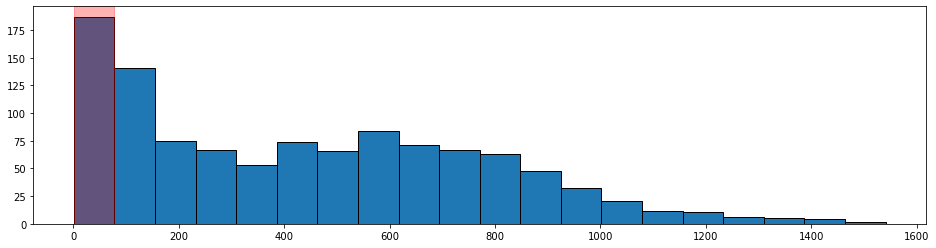

In [150]:
plt.figure(figsize=(16,4))
hist, bins, _ = plt.hist(data_matrix['G'], bins=20, edgecolor='black')

# Znalezienie przedziału z największą ilością obserwacji
max_bin_index = np.argmax(hist)
max_bin = (bins[max_bin_index], bins[max_bin_index + 1])
plt.axvspan(max_bin[0], max_bin[1], color='red', alpha=0.3, label=f'Max bin: {max_bin}')

In [151]:
for i in range(20):
    bin_start, bin_end = bins[i], bins[i + 1]
    bin_count = hist[i]
    print(f"({bin_start:.2f}, {bin_end:.2f}), Ilość obserwacji: {bin_count}")

(1.00, 78.00), Ilość obserwacji: 187.0
(78.00, 155.00), Ilość obserwacji: 141.0
(155.00, 232.00), Ilość obserwacji: 75.0
(232.00, 309.00), Ilość obserwacji: 67.0
(309.00, 386.00), Ilość obserwacji: 53.0
(386.00, 463.00), Ilość obserwacji: 74.0
(463.00, 540.00), Ilość obserwacji: 66.0
(540.00, 617.00), Ilość obserwacji: 84.0
(617.00, 694.00), Ilość obserwacji: 71.0
(694.00, 771.00), Ilość obserwacji: 67.0
(771.00, 848.00), Ilość obserwacji: 63.0
(848.00, 925.00), Ilość obserwacji: 48.0
(925.00, 1002.00), Ilość obserwacji: 32.0
(1002.00, 1079.00), Ilość obserwacji: 21.0
(1079.00, 1156.00), Ilość obserwacji: 12.0
(1156.00, 1233.00), Ilość obserwacji: 11.0
(1233.00, 1310.00), Ilość obserwacji: 6.0
(1310.00, 1387.00), Ilość obserwacji: 5.0
(1387.00, 1464.00), Ilość obserwacji: 4.0
(1464.00, 1541.00), Ilość obserwacji: 2.0


In [160]:
data_matrix_G155 = data_matrix[data_matrix['G'] <= 155]
data_matrix_G155

,Yrs,Const,Pk,G,TOTMP,TOTPTS,TOTTRB,TOTAST,FG%,3P%,FT%,WS/48,BPM,VORP,MPG,PPG,RPG,APG,Height,Weight
7,3.0,1,8,105.0,1336.0,574.0,162.0,98.0,0.386,0.291,0.728,0.004,-5.7,-1.2,12.7,5.5,1.5,0.9,195.0,86.0
13,3.0,1,14,115.0,2964.0,1273.0,233.0,326.0,0.410,0.362,0.749,0.039,-2.6,-0.5,25.8,11.1,2.0,2.8,189.0,86.0
14,3.0,1,15,90.0,594.0,306.0,77.0,61.0,0.392,0.277,0.860,0.018,-3.9,-0.3,6.6,3.4,0.9,0.7,198.0,86.0
32,3.0,1,26,142.0,1045.0,289.0,110.0,117.0,0.436,0.253,0.667,0.031,-3.2,-0.3,7.4,2.0,0.8,0.8,195.0,86.0
34,2.0,1,28,52.0,192.0,53.0,67.0,2.0,0.333,0.000,0.650,0.031,-8.0,-0.3,3.7,1.0,1.3,0.0,213.0,108.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571,4.0,1,51,116.0,1044.0,325.0,227.0,80.0,0.491,0.157,0.522,0.062,-3.7,-0.5,9.0,2.8,2.0,0.7,201.0,99.0
1575,1.0,1,55,64.0,973.0,183.0,87.0,130.0,0.345,0.190,0.548,0.006,-5.1,-0.8,15.2,2.9,1.4,2.0,192.0,86.0
1576,2.0,1,56,44.0,457.0,97.0,69.0,29.0,0.304,0.222,0.375,-0.028,-5.5,-0.4,10.4,2.2,1.6,0.7,201.0,91.0
1578,4.0,1,58,123.0,1696.0,846.0,225.0,167.0,0.417,0.355,0.772,0.048,-2.1,0.0,13.8,6.9,1.8,1.4,198.0,81.0


In [161]:
y_G155 = data_matrix_G155['Yrs'].to_numpy()

In [162]:
X_G155 = data_matrix_G155.iloc[:, 1:].values
X_G155 = X_G155.astype(float)

In [163]:
model_G155 = sm.OLS(y_G155, X_G155).fit()

In [166]:
model_G155.cov_params()

array([[ 1.45038275e+00, -9.21200681e-04, -3.44941171e-04,
        -2.42896833e-05,  6.46715861e-05,  1.60559782e-04,
         3.85786043e-04, -3.06425321e-01, -6.27232417e-02,
        -1.13031453e-01,  2.26242332e-01, -1.51692831e-03,
         5.86101877e-03,  5.88302673e-04, -6.44840566e-04,
         8.80810260e-03, -8.95237411e-02, -4.57571062e-03,
        -2.80146447e-03],
       [-9.21200681e-04,  1.50728904e-05,  9.40501468e-07,
        -5.10277511e-08,  8.77379775e-08,  3.78778152e-07,
        -3.91200020e-08, -2.50311077e-04,  1.85095275e-05,
         9.21600426e-05,  1.30149271e-04, -3.24143211e-06,
        -4.50293192e-05, -5.48816320e-06,  1.85230803e-05,
        -2.74244923e-05,  7.57151062e-06,  8.68032095e-07,
         1.52080350e-06],
       [-3.44941171e-04,  9.40501468e-07,  9.99682156e-06,
        -5.88736210e-07, -7.48771349e-08, -5.44899467e-07,
        -8.77969616e-07, -4.13519063e-04,  4.96931975e-05,
        -1.61664831e-04, -6.77098334e-05, -1.95842721e-06,
    

<br>

In [152]:
data_matrix.describe()

,Yrs,Const,Pk,G,TOTMP,TOTPTS,TOTTRB,TOTAST,FG%,3P%,FT%,WS/48,BPM,VORP,MPG,PPG,RPG,APG,Height,Weight
count,1089.000000,1089.0,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,7.810836,1.0,25.348026,439.568411,10775.742883,4566.041322,1909.134986,989.013774,0.435245,0.263678,0.723619,0.067341,-1.851699,5.859871,19.291368,7.678696,3.331680,1.651974,198.019284,99.544536
std,4.726824,0.0,15.679086,337.299078,10660.702905,5343.792585,2217.242668,1448.967101,0.063727,0.134910,0.109183,0.075219,3.367011,13.293808,8.410446,4.918345,2.131706,1.497448,11.130022,12.497650
min,1.000000,1.0,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.597000,-25.500000,-7.800000,2.500000,0.000000,0.000000,0.000000,155.000000,68.000000
25%,3.000000,1.0,12.000000,127.000000,1537.000000,453.000000,226.000000,94.000000,0.406000,0.196000,0.665000,0.035000,-3.500000,-0.500000,12.400000,3.900000,1.800000,0.600000,186.000000,91.000000
50%,8.000000,1.0,24.000000,414.000000,7592.000000,2568.000000,1232.000000,423.000000,0.435000,0.313000,0.740000,0.073000,-1.800000,0.200000,19.000000,6.600000,2.900000,1.200000,198.000000,100.000000
75%,11.000000,1.0,38.000000,689.000000,17284.000000,6849.000000,2784.000000,1271.000000,0.469000,0.354000,0.797000,0.104000,-0.100000,7.200000,25.800000,10.300000,4.400000,2.200000,207.000000,109.000000
max,22.000000,1.0,60.000000,1541.000000,51563.000000,36559.000000,15091.000000,12091.000000,1.000000,1.000000,1.000000,1.367000,51.100000,141.400000,41.100000,27.100000,13.400000,9.500000,232.000000,147.000000


In [153]:
data_matrix[data_matrix['G'] < 5]

,Yrs,Const,Pk,G,TOTMP,TOTPTS,TOTTRB,TOTAST,FG%,3P%,FT%,WS/48,BPM,VORP,MPG,PPG,RPG,APG,Height,Weight
180,1.0,1,52,2.0,12.0,3.0,3.0,2.0,0.250,0.00,0.5,-0.126,-8.5,0.0,6.0,1.5,1.5,1.0,204.0,102.0
270,1.0,1,34,4.0,42.0,15.0,5.0,1.0,0.333,0.00,1.0,0.076,-1.2,0.0,10.5,3.8,1.3,0.3,192.0,86.0
557,1.0,1,40,3.0,15.0,13.0,4.0,1.0,0.500,0.25,1.0,0.280,9.4,0.0,5.0,4.3,1.3,0.3,204.0,97.0
564,1.0,1,47,1.0,3.0,4.0,0.0,2.0,1.000,1.00,0.5,1.367,51.1,0.0,3.0,4.0,0.0,2.0,155.0,75.0
620,1.0,1,45,1.0,25.0,5.0,0.0,0.0,0.333,0.00,1.0,-0.022,-5.4,0.0,25.0,5.0,0.0,0.0,198.0,86.0
1121,1.0,1,42,2.0,37.0,10.0,11.0,1.0,0.273,0.00,1.0,0.147,-4.7,0.0,18.5,5.0,5.5,0.5,204.0,100.0
1197,1.0,1,58,2.0,23.0,9.0,4.0,1.0,0.300,0.25,1.0,0.037,-2.7,0.0,11.5,4.5,2.0,0.5,198.0,95.0
1319,1.0,1,53,3.0,21.0,7.0,3.0,2.0,0.333,0.00,1.0,-0.047,-6.0,0.0,7.0,2.3,1.0,0.7,204.0,102.0


In [154]:
model10_reduced.rsquared

0.9513467101501222

In [155]:
model.rsquared

0.9519861866090311

In [156]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1179.
Date:                Tue, 19 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:26:03   Log-Likelihood:                -1583.0
No. Observations:                1089   AIC:                             3204.
Df Residuals:                    1070   BIC:                             3299.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0535      0.832      1.267      0.206      -0.578       2.685
x1            -0.0029      0.002     -1.185      0.236      -0.008       0.002
x2             0.0174      0.000     38.756      0.000       0.016       0.018
x3            -0.0001   3.48e-05     -4.194      0.000      -0.000   -7.76e-05
x4          1.871e-05   5.41e-05      0.346      0.729   -8.74e-05       0.000
x5         -3.386e-05   8.05e-05     -0.421      0.674      -0.000       0.000
x6          -6.55e-05      0.000     -0.583      0.560      -0.000       0.000
x7            -0.7095      0.905     -0.784      0.433      -2.486       1.067
x8            -0.0362      0.309     -0.117      0.907      -0.643       0.571
x9            -0.6854      0.381     -1.800      0.072      -1.432       0.062
x10            1.0537      1.586      0.664      0.507      -2.059       4.166
x11            0.0021      0.037      0.057      0.955      -0.071       0.075
x12            0.0094      0.007      1.281      0.200      -0.005       0.024
x13            0.0012      0.021      0.056      0.955      -0.041       0.043
x14            0.0304      0.039      0.786      0.432      -0.046       0.106
x15            0.0128      0.064      0.199      0.842      -0.113       0.139
x16            0.0303      0.085      0.358      0.721      -0.136       0.196
x17            0.0038      0.003      1.147      0.251      -0.003       0.010
x18            0.0040      0.004      0.935      0.350      -0.004       0.012
==============================================================================
Omnibus:                      191.944   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              440.795
Skew:                           0.970   Prob(JB):                     1.92e-96
Kurtosis:                       5.439   Cond. No.                     8.95e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.95e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

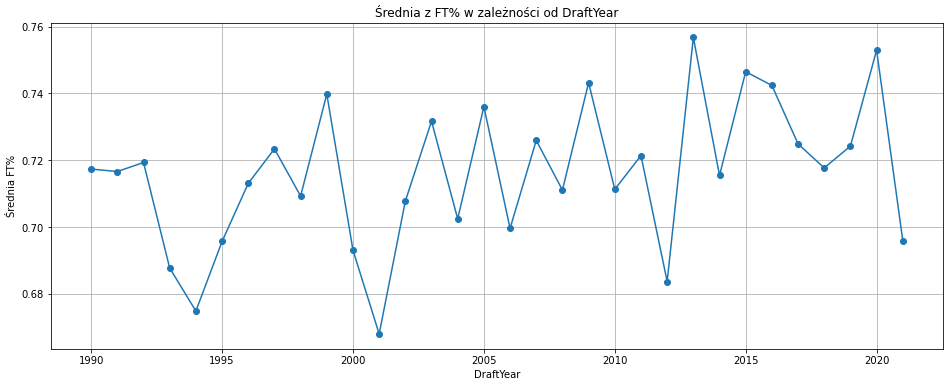

In [157]:
average_ft_percentage = merged_df.groupby('DraftYear')['FT%'].mean()

# Przedstaw wyniki na wykresie liniowym
plt.figure(figsize=(16, 6))
plt.plot(average_ft_percentage.index, average_ft_percentage.values, marker='o', linestyle='-')
plt.title('Średnia z FT% w zależności od DraftYear')
plt.xlabel('DraftYear')
plt.ylabel('Średnia FT%')
plt.grid(True)
plt.show()

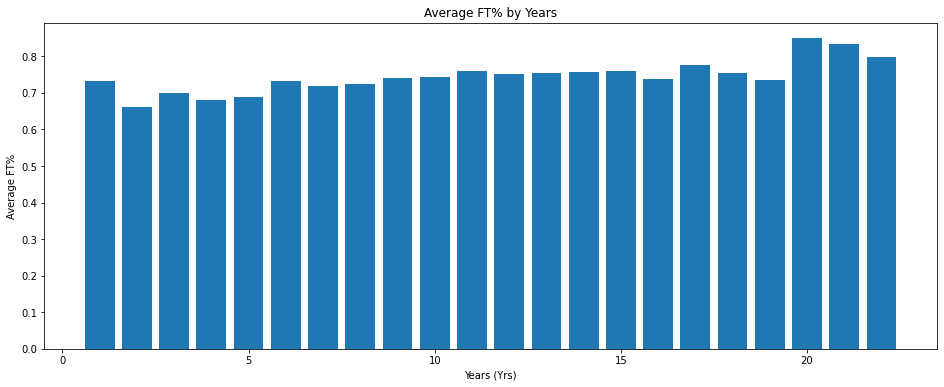

    Years (Yrs)  Average FT%  Number of Players
0           1.0     0.732290                 69
1           2.0     0.660091                110
2           3.0     0.700787                 94
3           4.0     0.680337                 92
4           5.0     0.688220                 50
5           6.0     0.732138                 58
6           7.0     0.719608                 51
7           8.0     0.723195                 77
8           9.0     0.740507                 69
9          10.0     0.744469                 81
10         11.0     0.760216                 74
11         12.0     0.750458                 59
12         13.0     0.755174                 69
13         14.0     0.758039                 51
14         15.0     0.760130                 23
15         16.0     0.738474                 19
16         17.0     0.774929                 14
17         18.0     0.754467                 15
18         19.0     0.735000                  9
19         20.0     0.849500            

In [158]:
grouped_data = data_matrix.groupby('Yrs')['FT%'].agg(['mean', 'count']).reset_index()

plt.figure(figsize=(16,6))
plt.bar(grouped_data['Yrs'], grouped_data['mean'])
plt.xlabel('Years (Yrs)')
plt.ylabel('Average FT%')
plt.title('Average FT% by Years')
plt.show()


table_data = pd.DataFrame({
    'Years (Yrs)': grouped_data['Yrs'],
    'Average FT%': grouped_data['mean'],
    'Number of Players': grouped_data['count']
})

print(table_data)